#  Opas Seaborn-kirjaston hyödyntämiseen bisnesdatan visualisoimisessa

Seaborn-visualisoinnit laaditaan Python-koodikielellä, mutta tekoälyä hyödyntämällä myös aloittelijat onnistuvat luomaan sillä visualisointeja. Mikään tekoälytyökalu ei ole täydellinen, joten siihen ei kannata luottaa aina sokeasti. Tämä opas on luotu hyödyntäen Copilotia ja ChatGPT:tä.

## No-code vs Python-Seaborn visualisoinnit
Seuraavassa kuvassa esimerkki miten Power BIssä ja Seabornilla tehdyt visualisoinnit eroavat toisistaan. Power BI:llä on yleensä tarkoitus luoda dashboardeja, joista ilmenee datasta esiintyvä tieto katsojalle, kun taas Python-pohjaiset Seaborn -visualisoinnit sopivat paremmin datan syvällisempään tutkimiseen. Esimerkki kuvassa Power BI jätti visualisointiin rivejä, joista puuttui arvo, jolloin näyttää, että sukupuolia olisi enemmän kuin male ja female. Seaborn ohittaa automaattisesti nämä puuttuvat arvot ja siinä merkkien selitys on myös selkeämmin esillä. Seaborn sisältää valmiita datasettejä, jotka sopivat visualisointien harjoitteluun hyvin, löydät niistä lisää [täältä](https://www.geeksforgeeks.org/data-science/seaborn-datasets-for-data-science/).

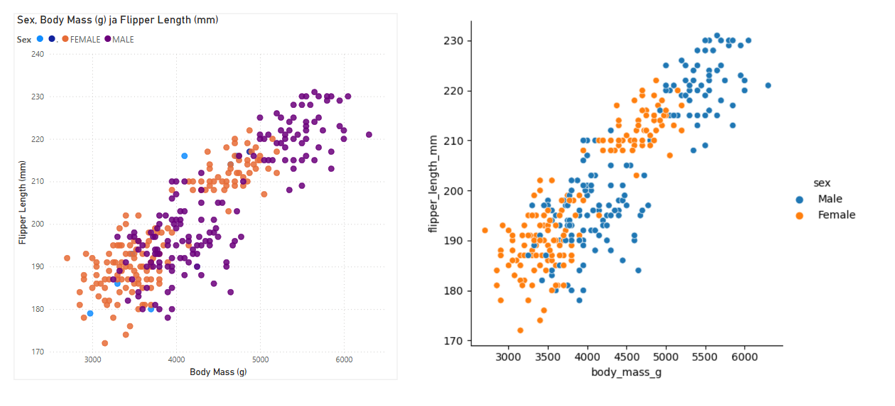

In [135]:
from IPython.display import Image, display
display(Image(r"C:\Users\mirka\OneDrive\Pictures\Screenshot 2025-06-18 141928.png"))

## Aloitus

Voit luoda visualisoinnit esimerkiksi Jupyter notebookissa tai Google Colabissa. Koodikirjastoissa, kuten Seaborn, on valmiiksi suuri määrä eri toimintoja, joiden avulla ohjelmointia voidaan helpottaa kun jokaista koodia ei tarvitse erikseen kirjoittaa. Aluksi tuodaan (import) kaikki kirjastot, joita tarvitaan tässä notebookissa (numpy, pandas, matplotlib ja seaborn), saat lisättyä näitä myöhemminkin jos tarvitset vielä muitakin. Kirjastojen nimet lyhennetään tässä as komenolla, jotta myöhemmin kun tarvitaan koodia Seabornesta se voidaan ilmaista lyhyesti sns. Osalla kirjastoja on vakiintuneet lyhenteet, mutta jos kirjaston nimi on valmiiksi jo lyhyt sitä ei välttämättä tarvitse lyhentää.

- numpy 
- pandas
- matplotlib
- seaborn

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

Ohjelma ilmoittaa jos kaikkia tarvittavia kirjastoja ei ole vielä asennettu. Asennetaan vielä pyydetyt esimerkiksi openpyxl seuraavalla komennolla.

In [137]:
!pip install openpyxl


Visualisoinneissa käytetään ERP-simulaatiopelissä kertynyttä dataa, joka on tallennettu Excel-taulukkoon. Ensin tuodaan käytettävä datasetti työkirjaan. Kopioi tiedoston polku omasta kansiostasi, mutta muista lisätä r polun eteen tai tuplaa \ -merkki, jotta tiedosto toimii, /-merkki polussa toimii sellaisenaan (MacOS).

Print -komennolla saadaan lista tiedoston Sales -välilehden sarakkeiden nimistä. Kaikki nimet on kirjoitettu isolla, joka saattaa vaikeuttaa datalla työskentelyä.

In [138]:
df_sales = pd.read_excel(r'C:\Users\mirka\Downloads\odata_extraction.xlsx', sheet_name="Sales")

print(df_sales.columns.tolist())

['ID', 'ROW_ID', 'SALES_ORGANIZATION', 'SIM_ROUND', 'SIM_STEP', 'SIM_DATE', 'SIM_CALENDAR_DATE', 'SIM_PERIOD', 'SIM_ELAPSED_STEPS', 'SALES_ORDER_NUMBER', 'LINE_ITEM', 'STORAGE_LOCATION', 'REGION', 'AREA', 'CITY', 'COUNTRY', 'POSTAL_CODE', 'CUSTOMER_NUMBER', 'DISTRIBUTION_CHANNEL', 'MATERIAL_NUMBER', 'MATERIAL_DESCRIPTION', 'MATERIAL_TYPE', 'MATERIAL_CODE', 'MATERIAL_SIZE', 'MATERIAL_LABEL', 'QUANTITY', 'QUANTITY_DELIVERED', 'UNIT', 'NET_PRICE', 'NET_VALUE', 'COST', 'CURRENCY', 'CONTRIBUTION_MARGIN', 'CONTRIBUTION_MARGIN_PCT']


Muokataan sarake nimiä komennolla: .str.strip().str.lower(), joka poistaa ylimääräiset välilyönnit sekä muuttaa nimet pienelle kirjoitukselle.

Käytetään vielä print -komentoa tarkistamaan lopputulos. Tulostetaan esiin myös data tyypit ja tarkistetaan, että numeromuodossa tarvittavat sarakkeet, kuten määrät ja arvot, ovat muodoltaan int64 (kokonaisluvut) tai float64 (desimaaliluvut).

In [139]:
df_sales.columns = df_sales.columns.str.strip().str.lower()

print(df_sales.columns.tolist())
print(df_sales.nunique())
print(df_sales.dtypes)

['id', 'row_id', 'sales_organization', 'sim_round', 'sim_step', 'sim_date', 'sim_calendar_date', 'sim_period', 'sim_elapsed_steps', 'sales_order_number', 'line_item', 'storage_location', 'region', 'area', 'city', 'country', 'postal_code', 'customer_number', 'distribution_channel', 'material_number', 'material_description', 'material_type', 'material_code', 'material_size', 'material_label', 'quantity', 'quantity_delivered', 'unit', 'net_price', 'net_value', 'cost', 'currency', 'contribution_margin', 'contribution_margin_pct']
id                         3924
row_id                     3924
sales_organization           14
sim_round                     4
sim_step                     20
sim_date                     77
sim_calendar_date            77
sim_period                   16
sim_elapsed_steps            77
sales_order_number         2272
line_item                     7
storage_location              1
region                       16
area                          3
city                

## Tilastolliset visualisoinnit

Tilastolliset visualisoinnit kuvaavat numeroarvoja sisältävää dataa. Visualisoinneissa voidaan käyttää esimerkiksi keskiarvoja, jakaumia tai yhteyksiä muihin muuttujiin.

Aloitetaan yksinkertaisilla visualisoinneilla. Kuvaajissa on käytetty Matplotlibin komentoa plt.show(), jotta kuvaajaan ei tulostu ylimääräisiä selitetekstejä.

Tässä Seabornilla tehty pylväskaavio, joka kuvaa eri kategorioiden tilausten keskimääräistä arvoa (y-akselilla). Pylväiden päistä lähtevät viivat kuvaavat luottamusväliä (oletus 95%), joka kuvaa mille välille todellinen keskiarvo todennäköisesti sijoittuu. Seaborn näkee datan aina ns. otoksena, joten oletuksena se antaa luottamusvälin useille kuvaajilla vaikka se ei aina ole tarpeen.

In [140]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

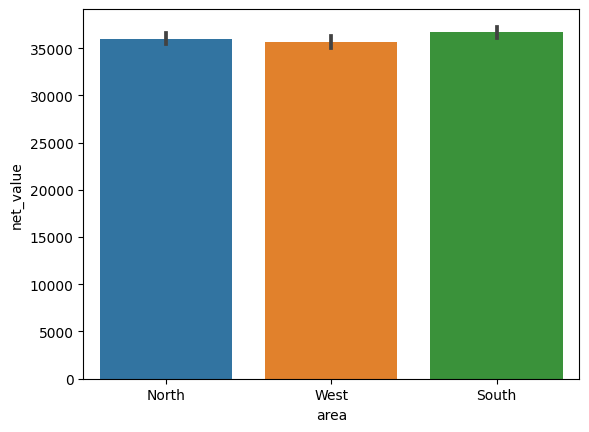

In [141]:
sns.barplot(data=df_sales, x="area", y="net_value")
plt.show()

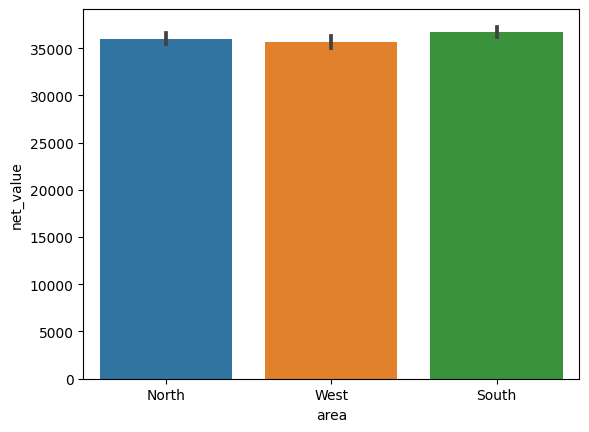

In [142]:
sns.barplot(data=df_sales, x="area", y="net_value", palette="tab10")
plt.show()


Jos halutaan luoda perinteisempi pylväskaavio, josa y-akselia ei kuvaa keskiarvo on koodiin lisättävä estimator= ja haluttu määrittäjä, esimerkiksi myyntien kokonaissumma seuraavassa visualisoinnissa. Luottamusväliä kuvaava viiva voidaan poistaa koodilla errorbar=None.

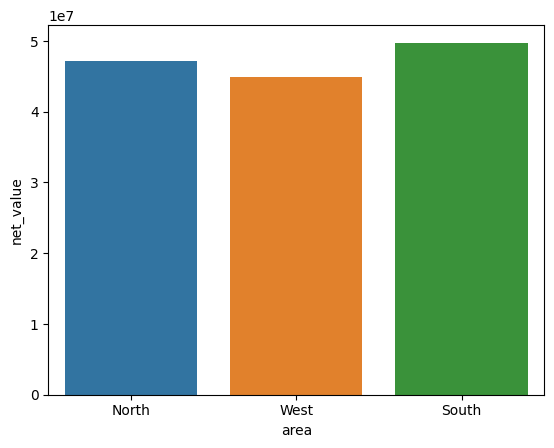

In [143]:
sns.barplot(data=df_sales, x="area", y="net_value", estimator=sum, errorbar=None)
plt.show()

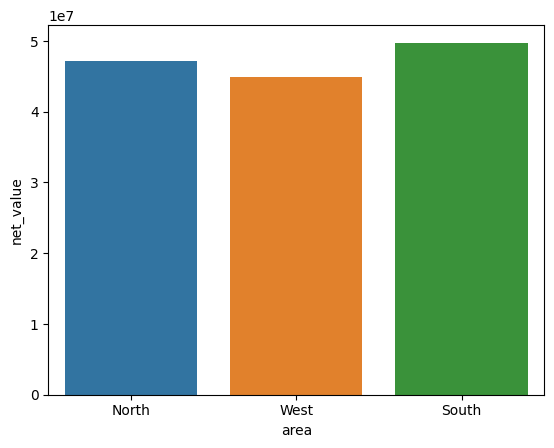

In [144]:
sns.barplot(data=df_sales, x="area", y="net_value", palette="tab10", estimator=sum, errorbar=None)
plt.show()

Seuraavassa kuvaajassa on Seabornin pointplot, jossa kolmen alueen myyntikatetta(%) (contribution_margin_pct) verrataan keskenään. Kuvaajan pisteet kuvaavat keskiarvoa ja niistä y-akselinsuuntaisesti lähtevä viiva luottamusväliä. Tässä tietopisteitä yhdistävä viiva toimii vain visuaalisena apuna kuvaamaan trendiä ja auttaa hahmottamaan varsinaisten tietopisteiden eroa, se ei kuvaa datan arvoja. Datassa sarake contribution_margin_pct on desimaalilukuna, joka muutettiin tähän kuvaajaan prosenttiluvuiksi.

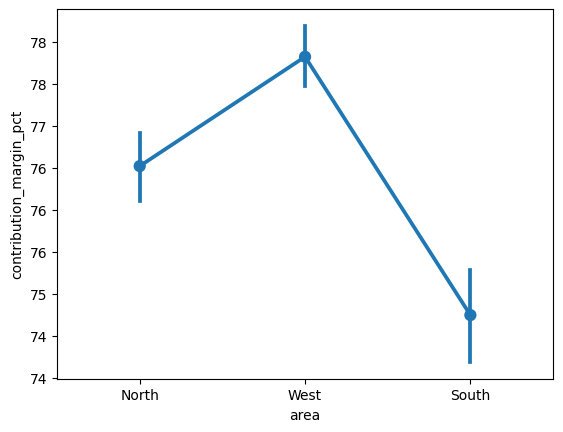

In [145]:
sns.pointplot(data=df_sales, x="area", y="contribution_margin_pct")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y*100:.0f}"))
plt.show()

Piirakkakaavioita pidetään tieteellisesti haastavina eikä niistä saada tarkkaa tietoa datasta, joten Seabornilla ei pysty yksinään tekemään niitä. Jos kuitenkin halutaan luoda sellainen Matplotlibin (tämä on löydyttävä koodista import matplotlib.pyplot as plt) avulla tehtynä se näyttäisi seuraavalta. Huomaathan, että kuvion värit muuttuvat hieman kun siirrtyään Seabornista Matplotlibiin.
Haluttiin myyntien prosenttiosuus näkyviin kokonaislukuna (0 desimaalia(f)) ja koodi autopct='%1.0f%%'tekee sen. Tämä toimii vain piirakkakaaviossa, muuten koodi olisi samanlainen kuin edellisen kuvaajan esimerkissä, koodilla FuncFormatter.

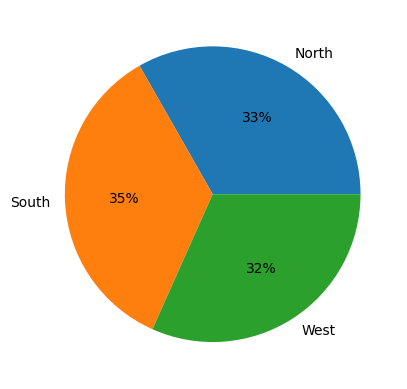

In [146]:
area_value = df_sales.groupby("area")["net_value"].sum()

plt.pie(
    area_value,
    labels=area_value.index,
    autopct='%1.0f%%')
plt.show()

## Relaatiokaaviot

Relplot() koodilla voi tehdä hajonta- tai viivakaavioita. Hajontakaavio on koodin vakiotyyppi ja viivakaavion saat lisäämällä koodin kind=line. Yksittäisiä kuvaajia voi tehdä myös koodeilla scatterplot() ja lineplot(), mutta vaativampaan työhön relplot() käyttö on parempi vaihtoehto.

### Hajontakaavio

Hajontakaavion tietopisteitä voit muokata komennoilla hue, style ja size. Hue antaa eri värit eri kategorioille. Style muuttaa tietopisteen muotoa, tässä 6 eri muuttujaa on maksimi. Koko muuttaa pisteiden kokoa datassa esiintyvyyden perusteella. Style ja size komentoja tulee käyttää harkitusti, koska ne saattavat tehdä kuvaajasta epäselvän. 

Seuraavassa kuvataan eri alueiden tilausten kokoa ja arvoa. Ensimmäisessä kuvaajassa kaikki alueet ovat samassa kuvaajassa, alueet voidaan erottaa omille kuvaajilleen koodilla col="area". Col tarkoittaa column eli sarake, joten kannattaa tarkistaa, että valittu muuttuja ei sisällä liian montaa erilaista arvoa. Toiseen kuvaajaan muokattiin myös tietopisteet erilaisiksi koodilla style="muuttuja".

Ensimmäinen kuvaaja voidaan toteuttaa myös koodilla:
sns.scatterplot(data=df_sales, x="quantity", y="net_value", hue="area")
plt.show()
Scatterplot ei suoraan tue koodia col=, joten toinen usean kuvaajan kaavio on monimutkaisempi toteuttaa ilman relplotin käyttöä.

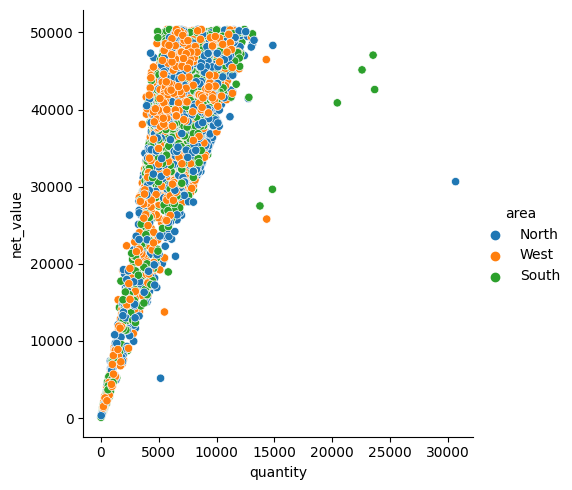

In [147]:
sns.relplot(data=df_sales, x="quantity", y="net_value", hue="area")
plt.show()

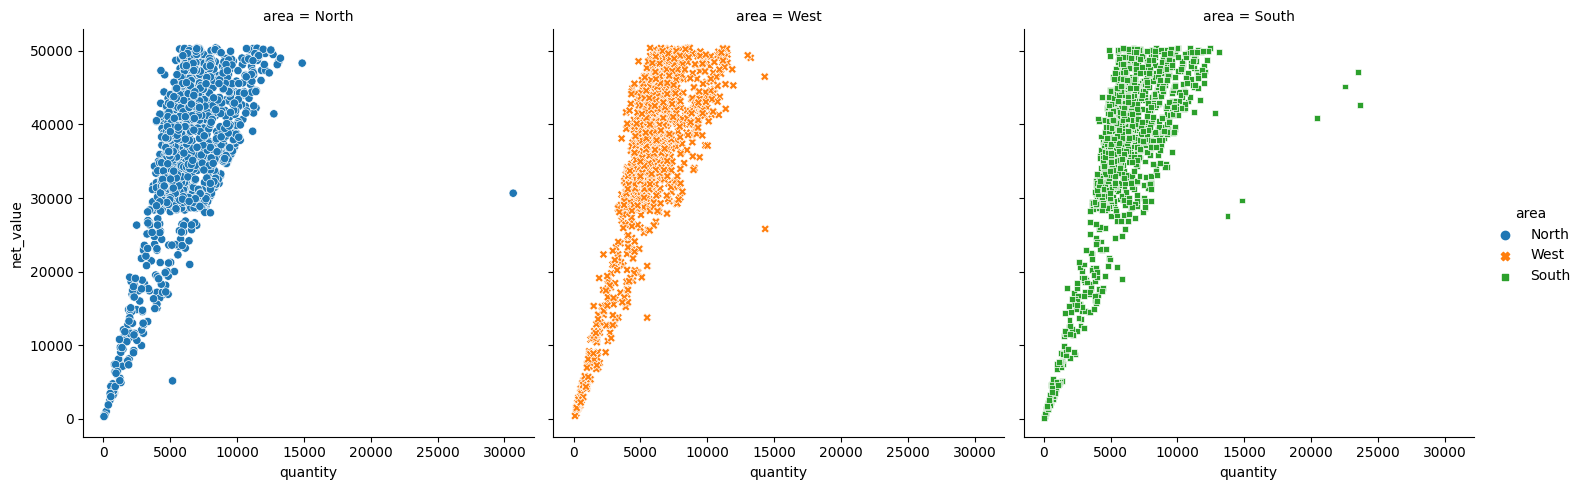

In [148]:
sns.relplot(data=df_sales, x="quantity", y="net_value", hue="area", style="area", col ="area")
plt.show()

### Viivakaavio

Viivakuviolla kuvataan usein muuttujan kehitystä ajan kuluessa, mutta x-akselilla voidaan käyttää myös muita muuttujia, kunhan niillä on looginen tai numeerinen järjestys. Seuraavassa kuvataan myynnin keskiarvon kehitystä, x-akselilla oleva ajan selite käännettiin vinoon, jotta tekstit näkyvät selkeämmin.

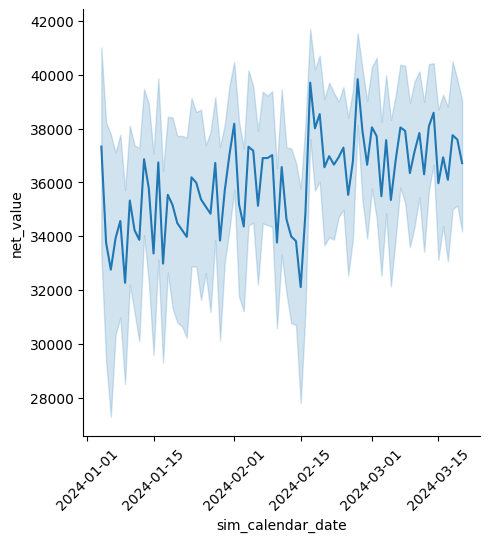

In [149]:
sns.relplot(data=df_sales, x="sim_calendar_date", y="net_value", kind="line")
plt.xticks(rotation=45)
plt.show()

Seaborn lisää kuvaajaan automaattisesti 95% luottamusvälin varjon, jonka voi poistaa koodilla errorbar=None. Koodi errorbar="sd" kuvaa hajontaa eli arvojen vaihtelun määrää keskiarvosta. Myös viivakaaviota voi muokata komennoilla hue, style ja size. 
Kuvaajaa voidaan muokata myös orient="y" komennolla, joka piirtää kuvaajan y-akselin suuntaisena, jolloin tutkittava muuttuja on x-akselilla ja aika y-akselilla. Seuraavasta kuvaajasta voidaan tarkastella myynnin kehitystä ilman luottamusvälin varjostusta.

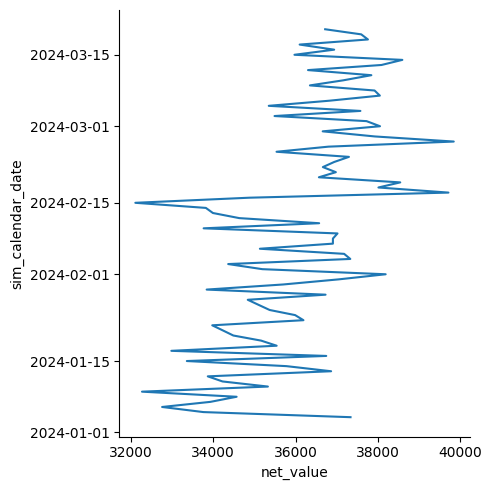

In [150]:
sns.relplot(
    data=df_sales,
    x="net_value",y="sim_calendar_date",
    kind="line",  orient="y",
    errorbar=None)
plt.show()

Myös viivakaavioon saadaan useita kuvaajia koodilla col=. Jos halutaan muokata kuvaajien määrää riveillä käytetään koodia col_wrap="rivien määrä, jolle kuvaajat piirtyy"(col_wrap=3). Height muuttaa kuvaajien korkeutta ja aspect leveyttä korkeuden suhteen. Tässä on kuvattu eri makujen ja pakkauskoon myyntikatteen kehitystä ajallisesti.

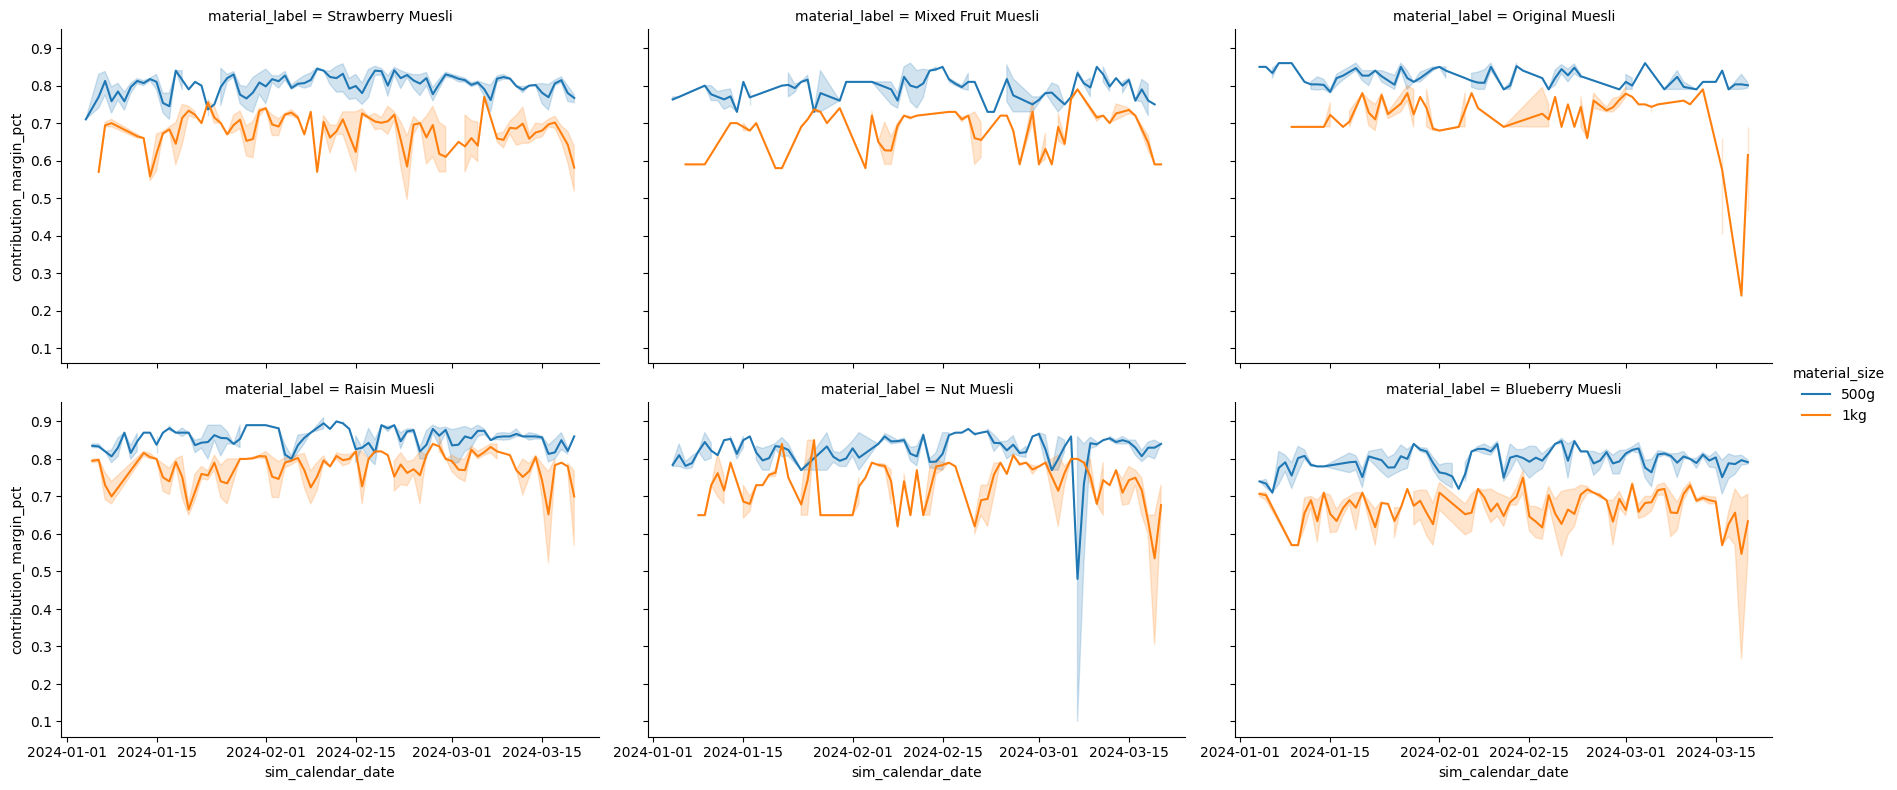

In [151]:
sns.relplot(
    data=df_sales, kind="line",
    x="sim_calendar_date", y="contribution_margin_pct", hue="material_size",
    col="material_label", col_wrap=3,
    height=4, aspect=1.5)
plt.show()

## Kategoriset kaaviot

Catplot() on Seabornissa kategoristen kuvaajien koodi ja sitä voidaan muokata koodilla kind="haluttu kuvaaja". Myös koodit kuten stripplot() toimivat, mutta catplot() on tarkoitettu juuri kategorioiden kuvaamiseen, joten se on monipuolisempi ja selkeämpi tähän tarkoitukseen. Catplotilla voi tehdä seuraavia kuvaajia kategorisesta datasta: pistekaaviot, jakaumat ja arviokaaviot. Oletusasetuksena siinä on stripplot jos kind= koodilla ei muuteta tyyppiä toiseksi.

### Pistekaaviot

Stripplot on kuin scatterplot, mutta koska x-akselin arvot ovat kategorioita kaikki arvopisteet jäävät tietyn kategorian kohdalle kuvaajassa. Seuraaviin kuvaajiin käytetään datan Marketing_Expenses välilehteä, jonka sarakeotsikot muutettiin pieneksi kirjoitukseksi. Tässä verrataan markkinointikustannusten alueellisia eroja.

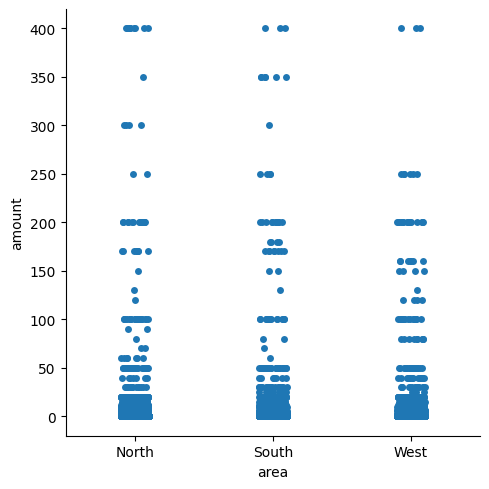

In [152]:
df_marketing = pd.read_excel(r'C:\Users\mirka\Downloads\odata_extraction.xlsx', sheet_name="Marketing_Expenses")
df_marketing.columns = df_marketing.columns.str.strip().str.lower()

sns.catplot(data=df_marketing, x="area", y="amount")
plt.show()

Stripplot asettaa arvopisteet lomittain antamaan paremman kuvan arvojen jakaumasta. Jitter=False -komento muodostaa viivamaisen kuvion pinoamalla datapisteet vain yhdeksi viivaksi, jolloin jakaumaa ei enää ilmene.

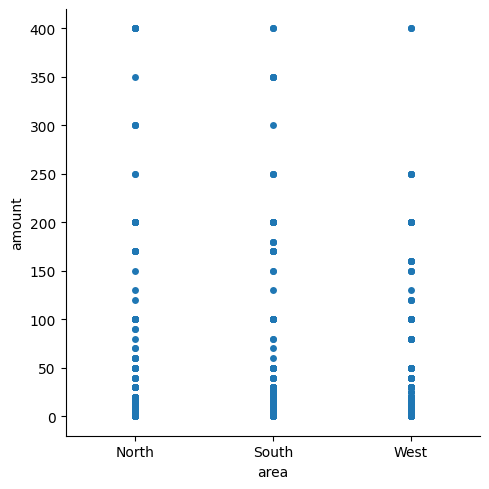

In [153]:
sns.catplot(data=df_marketing, x="area", y="amount", jitter=False)
plt.show()

Swarmplot on kuin stripplot, mutta se näyttää kaikki datassa olevat arvopisteet, ei pinoa samoja päällekkäin. Swarmplot toimii vain jos datapisteitä on vähän. Swarmplotin avulla data-arvojen poikkeuksia ja jakaumia on helppo huomata. Tässä datasta saatiin pieni otos lisäämällä koodi sample(satunnaisesti valittavien rivien määrä). Jos sample koodi ajetaan uudestaan, se etsii uudet sattumanvaraiset arvopisteet, joten kuvaaja muuttuu joka ajon jälkeen. Seuraava kuvaaja esittää myyntikatteen jakautumista alueittain asiakastyypin mukaan, 10= hypermarketit, 12= kauppaketjut ja 14= itsenäiset kaupat. 
Kategorisen muuttujan voi myös laittaa y-akselille, jolloin kuvaaja muuttuu vaakasuoraksi. Tämä toimii parhaiten jos kategorioilla on pitkiä nimiä tai niitä on paljon.

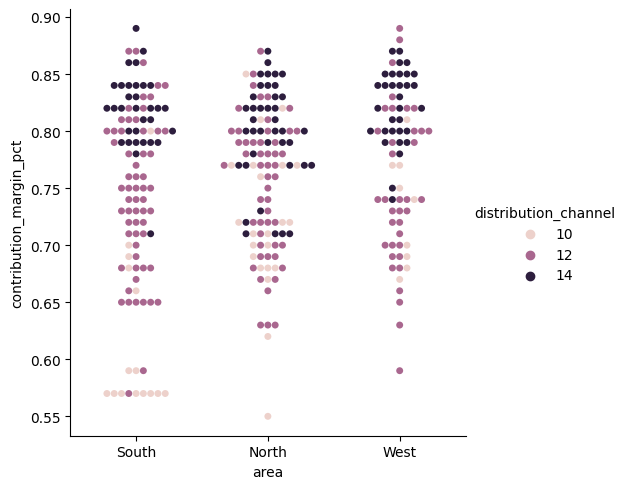

In [154]:
sns.catplot(
    data=df_sales.sample(300),
    x="area", y="contribution_margin_pct",
    hue="distribution_channel",
    kind="swarm",)
plt.show()

### Jakaumakaaviot

Datassa olevien arvojen jakaumien kuvaukseen sopii erityisen hyvin boxplot, boxenplot tai violinplot. 

Boxplotissa arvoja kuvaavat laatikot sisältävät viivan, joka on arvojen mediaani eli keskimmäinen arvo. Puolet datan arvoista sijoittuu laatikon sisään (keskimmäiset 50%), määrittäen sen koon. Laatikosta lähtevät viiksiksi kutsutut viivat kuvaavat missä suurimmat ja pienimmät arvot sijaitsevat, näiden arvojen ulkopuolella olevat yksittäiset ääripäiden arvot on kuvattu vielä erillisellä pisteellä. Seuraava kuvaaja kertoo mitä pakkauskokoja eri asiakastyypit ostavat.

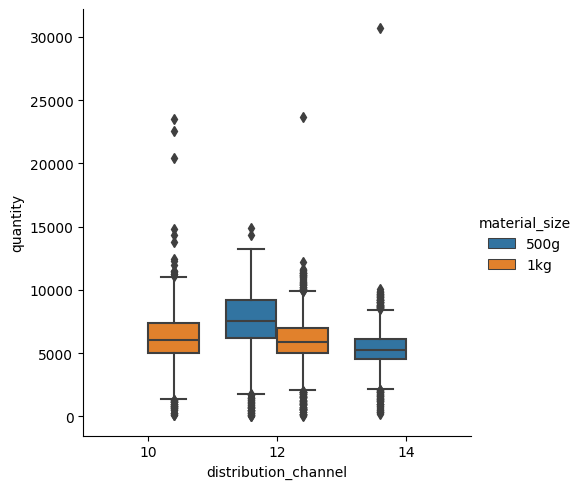

In [155]:
sns.catplot(data=df_sales, x="distribution_channel", y="quantity", hue="material_size", kind="box")
plt.show()

Boxenplot on samantyylinen kuvaaja kuin boxplot, mutta se keskittyy jakauman muotoon ja hyvä kuvaamaan erityisen suuria datamääriä. Tässä kuvaajassa esitettynä markkinointiin käytettyä rahaa. Haluttiin tarkastella vain muutamaa eri organisaatiota, joten sales_organization-sarake suodatettiin (filtered=) sisältämään vain valitut ryhmät CC, DD, KK ja LL. 

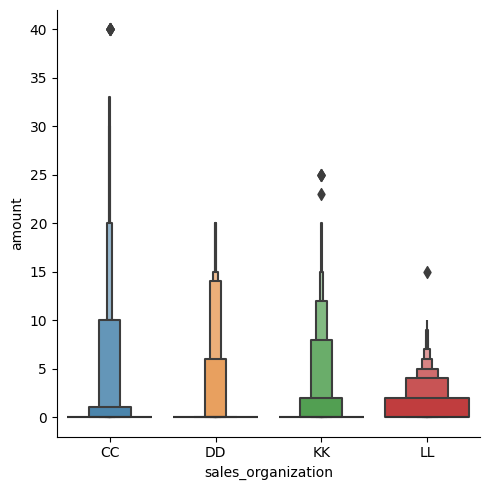

In [156]:
df_filtered = df_marketing[df_marketing["sales_organization"].isin(["CC", "DD", "KK", "LL"])]

sns.catplot( data=df_filtered, 
            x="sales_organization", y="amount",
            kind="boxen")
plt.show()

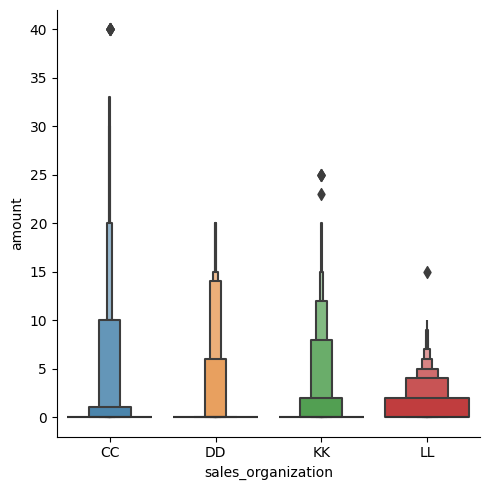

In [157]:
sns.catplot( data=df_filtered, 
            x="sales_organization", y="amount", palette="tab10",
            kind="boxen")
plt.show()

Violinplot yhdistää boxplotin tapaisen jakaumien vertailun ja tiheyttä kuvaavan KDE-arvion. Kuvaajaan suodatettiin Sales-välilehdeltä vertailuun haluttujen kaupunkien myyntien jakaumat asiakastyypin mukaan. Kuvio voidaan jakaa split=True komennolla, jolloin viulu kuvaa kahta tekijää, jäljempänä olevassa kuvaajassa pakkauskoon myynnin jakaumaa valituissa kaupungeissa.

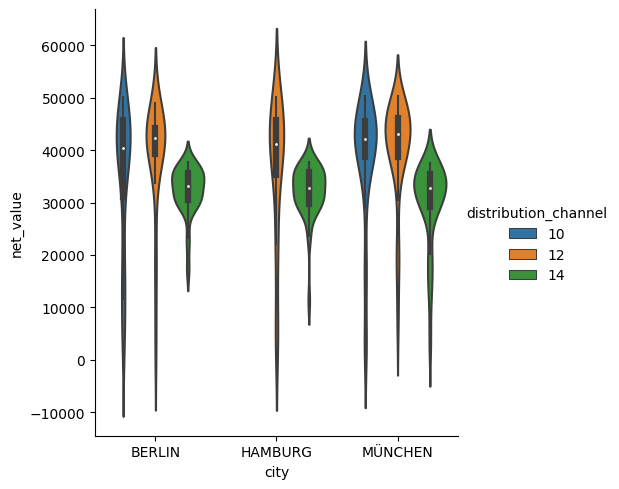

In [158]:
df_filteredcity = df_sales[df_sales["city"].isin(["BERLIN", "HAMBURG", "MÜNCHEN"])]
sns.catplot(
    data=df_filteredcity,
    x="city", y="net_value", hue="distribution_channel",
    kind="violin")
plt.show()

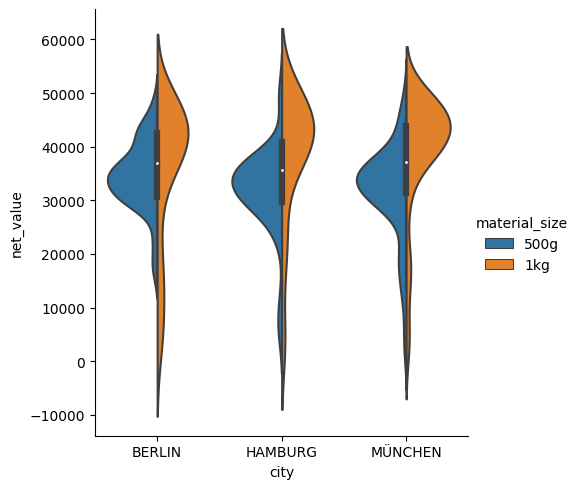

In [159]:
sns.catplot(
    data=df_filteredcity, x="city", y="net_value", hue="material_size",
    kind="violin", split=True,)
plt.show()

### Arviokaaviot

Jos halutaan tutkia aineiston eri kategorioiden määriä käytetään countplotia, tai keskiarvoja barplotilla tai pointplotilla. Kuvaajat käyttävät vakiona arvojen keskiarvoa, paitsi countplot joka summaa tietopisteet. Lisäämällä koodiin estimator= voit muuttaa sen esimerkiksi mediaaniksi tai moodiksi. Kuvaajissa arvopisteistä lähtevät viivat kuvaavat 95% luottamusväliä, tämän voit poistaa koodilla errorbar=None.

Coutplotilla voidaan helposti tutkia eri ryhmissä esiintyvien havaintojen määrää datassa. Tuotiin työkirjaan välilehti Purchase_Orders samalla tavalla kuin aiemmin ja sarake otsikot muutettiin pienellä kirjoitetuksi. Countplotin suuntaa voi muuttaa kirjaamalla muuttujan joko x- tai y-akselille, tässä käytettiin y-akselia, jotta ryhmien nimet ovat selkeämmin luettavissa. Esimerkki kuvaa kuinka paljon eri materiaaleja on ostettu.

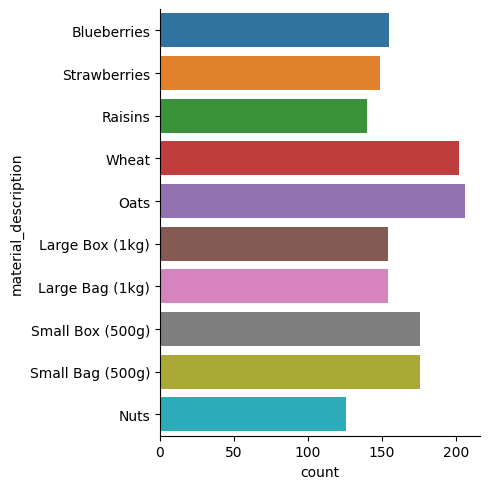

In [160]:
df_purchases = pd.read_excel(r'C:\Users\mirka\Downloads\odata_extraction.xlsx', sheet_name="Purchase_Orders")
df_purchases.columns = df_purchases.columns.str.strip().str.lower()

sns.catplot(data=df_purchases, y="material_description", kind="count")
plt.show()

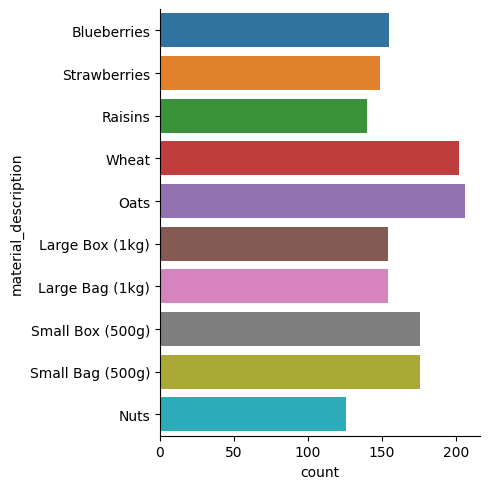

In [161]:
sns.catplot(data=df_purchases, y="material_description", palette="tab10", kind="count")
plt.show()

Mediaanilla voidaan tarkastella eri ryhmien (company_code) yleisiä tilausmääriä eri toimittajilta, hue= komento antaa toimittajille eriväriset palkit. Luottamusväliviiva kuvaa, minne mediaani todennäköisesti sijoittuu. Kuviosta haluttiin selkeämpi, joten sitä levennettiin koko koodeilla height ja aspect.

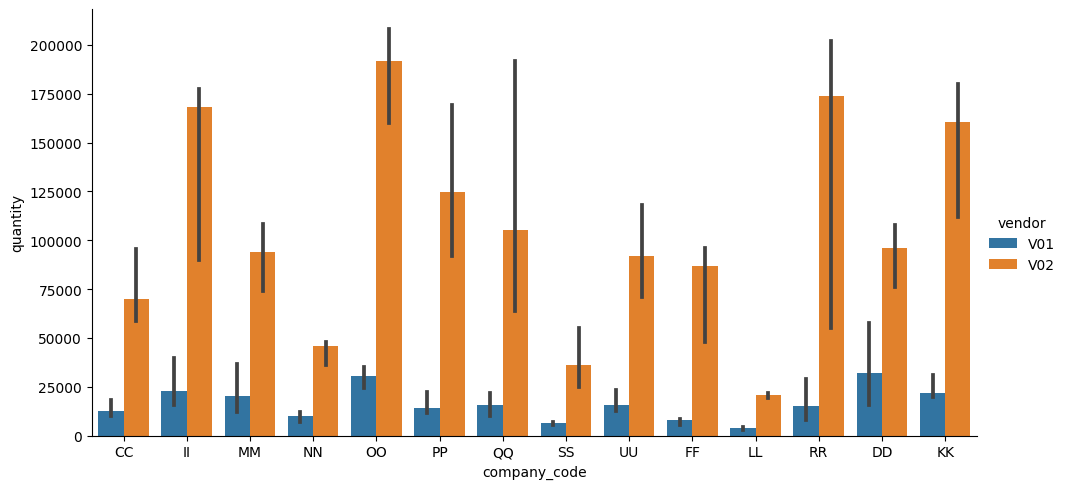

In [162]:
sns.catplot(
    data=df_purchases,
    x="company_code",
    y="quantity"  ,
    hue="vendor"                               ,
    kind="bar",
    estimator=np.median,
    height=5,
    aspect=2)
plt.show()

Pointplotissa keskiarvoa (tai muuta valittua laskennallista arvoa) kuvaavat pisteet yhdistyvät viivoilla, joka auttaa näkemään erot pisteiden välillä, viivoja voi muokata linestyles= komennolla yleisimmät tyylit ovat "-", "--", "-." ja ":". Visualisointi kuvaa keskimääräistä myyntihintaa eri asiakkaille alueittain jaettuna.

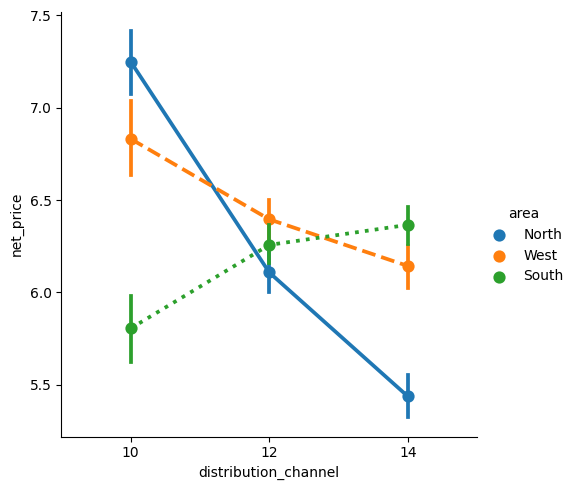

In [163]:
sns.catplot(
    data=df_sales,
    x="distribution_channel",
    y="net_price",
    hue= "area",
    kind="point",
    linestyles=["-", "--", ":"])
plt.show()

Catplotin avulla voidaan myös muodostaa vierekkäisiä kuvaajia col=-komennolla. Tässä käytettiin sen sijaan komentoa row=, jotta kuvaajat saatiin pinottua päällekkäin. Datalle tehtiin laskennallinen filteröinti, jolla etsittiin 3 suurinta myyntikatetta tekevää ryhmää. Näiden ryhmien markkinointikulujen kokonaissummaa (estimator=sum, muuten kuvaa keskiarvoa) verrataan kuvaajassa alueittain.

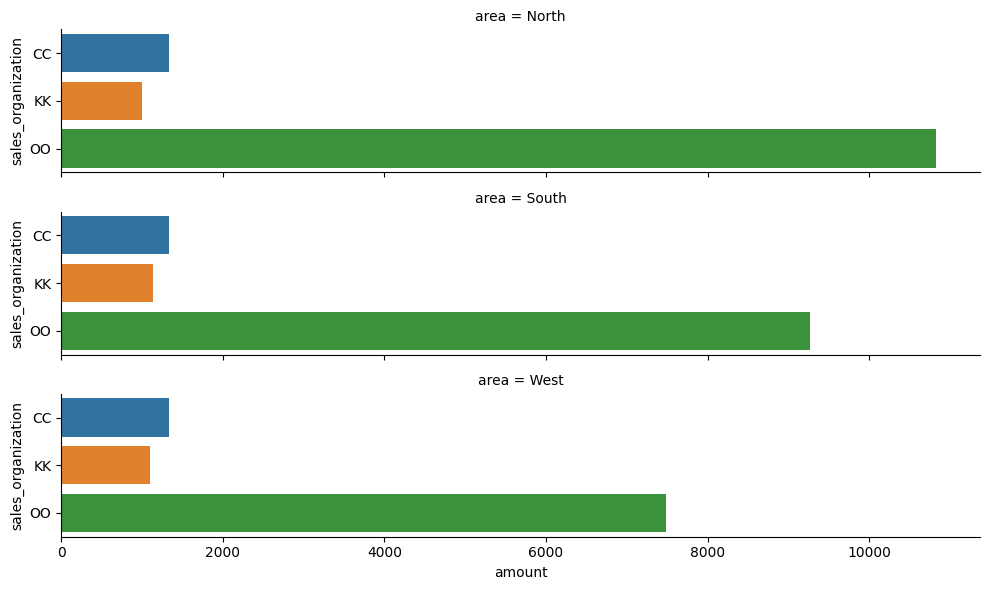

In [164]:
top3_orgs = (
    df_sales.groupby("sales_organization")["contribution_margin"]
    .sum()
    .nlargest(3)
    .index)

df_filteredtop = df_marketing[df_marketing["sales_organization"].isin(top3_orgs)]

sns.catplot(
    data=df_filteredtop,
    x="amount", y="sales_organization",
    row="area",
    kind="bar",
    errorbar=None,
    height=2,
    aspect=5,
    estimator=sum)
plt.show()

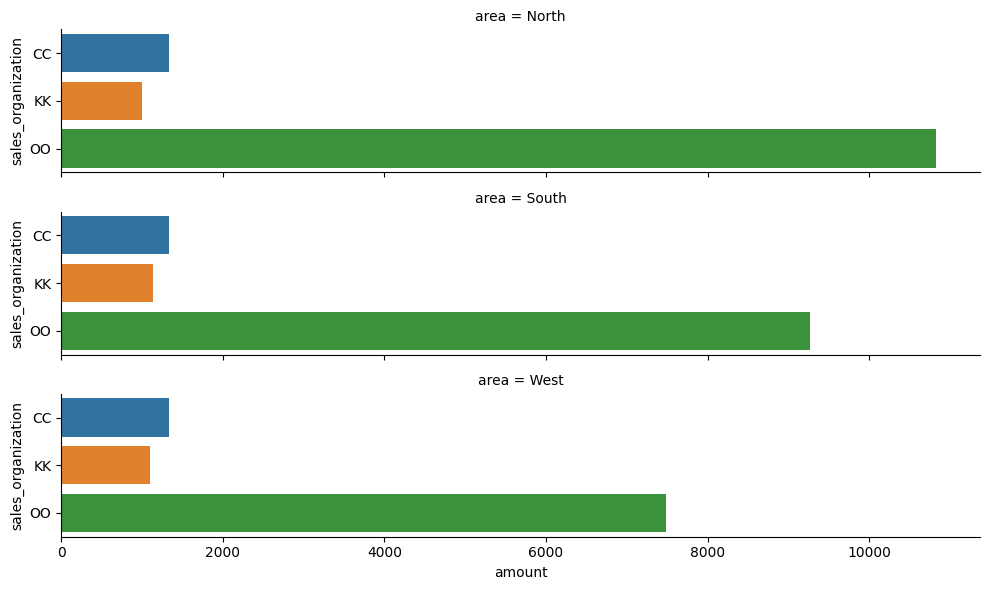

In [165]:
sns.catplot(
    data=df_filteredtop,
    x="amount", y="sales_organization",
    palette= "tab10",
    row="area",
    kind="bar",
    errorbar=None,
    height=2,
    aspect=5,
    estimator=sum)
plt.show()

## Jakaumien visualisointi

Jakauma visualisoinneilla voidaan analysoida datan jakaumia, keskittyvyyttä ja poikkeumien esiintyvyyttä. Jakaumia kuvataan koodilla displot(), mutta myös jointplot() ja pairplot() kuuluvat tähän kategoriaan.  Jakaumia voidaan kuvata kuvaajilla: histplot(), joka on koodin oletusasetus, kdeplot(), ecdfplot(), ja rugplot().

### Histogrammi

Histogrammin pylväiden leveyttä voi muokata komennolla binwidth=. Bins= tekee valitun määrän pylväitä kun bins=[] voit valita mistä arvoista pylväät muodostuu, jolloin niiden väliin muodostuu välit. Shrink= luo myös välit pylväiden väliin pienentämällä niitä. Lisäämällä koodiin kde=True saat kuvaajaan jakaumaa korostavan viivan. Esimerkki kuvaa myytyjen tuotteiden hinnan jakaumaa.

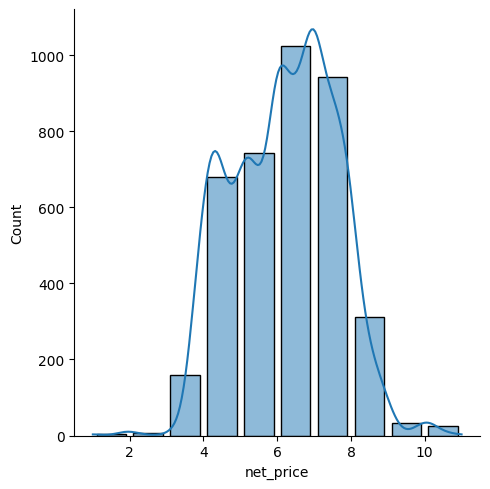

In [166]:
sns.displot(data=df_sales,
            x="net_price", binwidth=1,
            shrink=0.8,
           kde=True)
plt.show()   

Histogrammia voidaan muokata hue= komennolla. Jos näin luodut värierot eivät ole selkeitä, komennot element="step" ja multiple="stack", "fill" tai "dodge" saattavat auttaa.  Col= tai row= muodostaa usean kuvaajan visualisoinnin. Esimerkissä tarkastellaan tilausten koko luokkaa alueittain, eri asiakastyypit omissa kuvaajissaan.

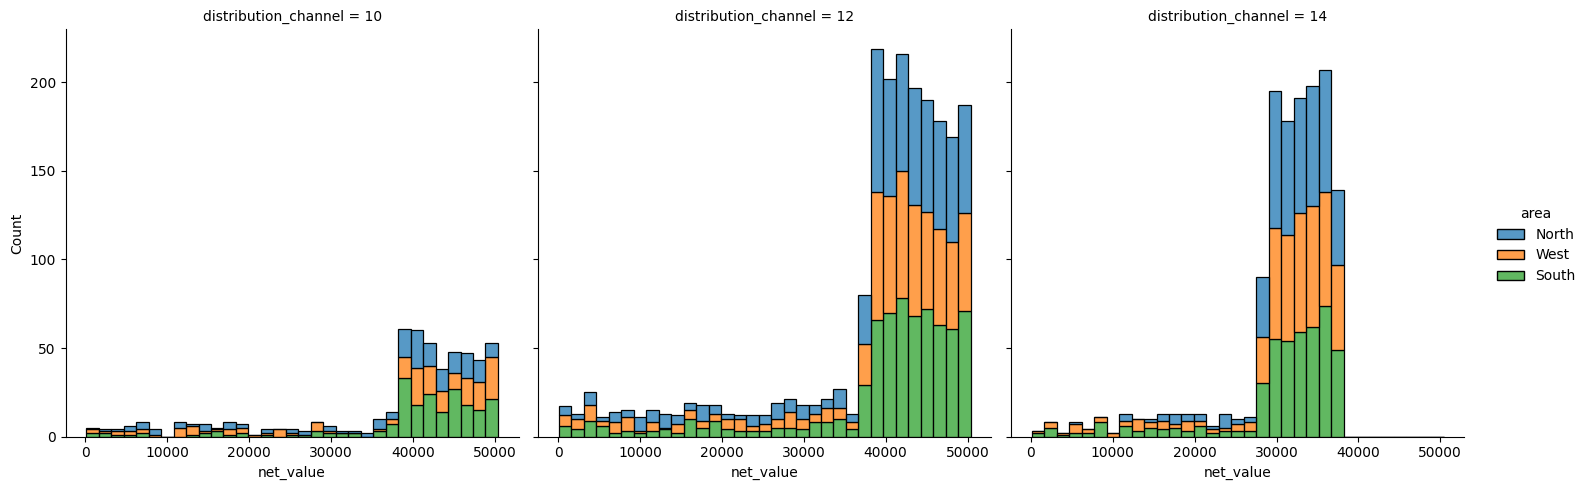

In [167]:
sns.displot(
    data=df_sales,
    x="net_value",
    hue="area",
    col="distribution_channel",
    multiple="stack")
plt.show()

### Tiheyskäyrä

Displot voidaan luoda myös pelkkänä tiheyskäyränä lisäämällä kind=kde koodiin. Käyrät saadaan päällekkäin koodilla multiple="stack" ja viivanalapuolen alueen väritettyä koodilla fill=True. Tässä kuvataan asiakasryhmien tilausten myyntikatteiden jakaumaa.

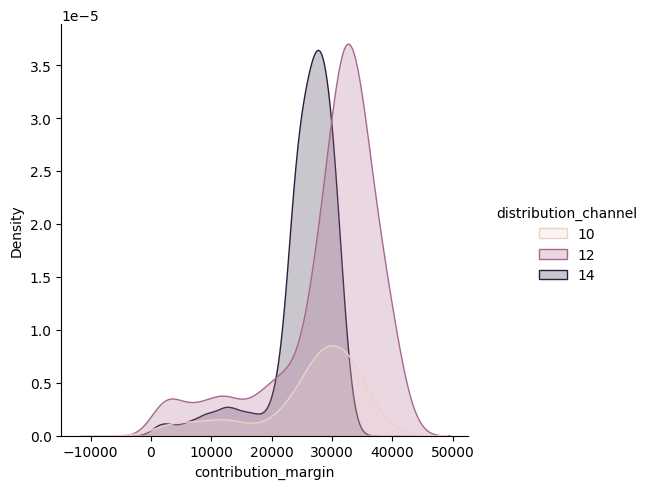

In [168]:
sns.displot(data=df_sales,
            x="contribution_margin",
            hue="distribution_channel",
            kind="kde",
            fill=True)
plt.show()

### Kahden muuttujan jakauma

Kahdella muuttujalla voi luoda ruudukkomaisen histogrammin tai koodilla kind="kde" tiheyskäyrävisualisoinnin. Ruudukkokuvaajaa voi muokata käskyillä: hue= määrittämällä kategoriat, binwidth=(leveys,korkeus) ja lisäämällä väriselitteen kuvaajan viereen cbar=True, binwidth= lukuun ottamatta samat komennot toimivat tiheyskäyräkuvaajassa. Ensimmäisessä kuvaajassa nähdään jakauma myyntituoton ja tuotehinnan välillä. Värin tummuus kuvaa esiintymisen tiheyttä. Toisessa kuvaajassa myyntituoton ja tilausten arvon jakaumat asiakastyypin mukaan tiheyskäyrille piirrettynä. 

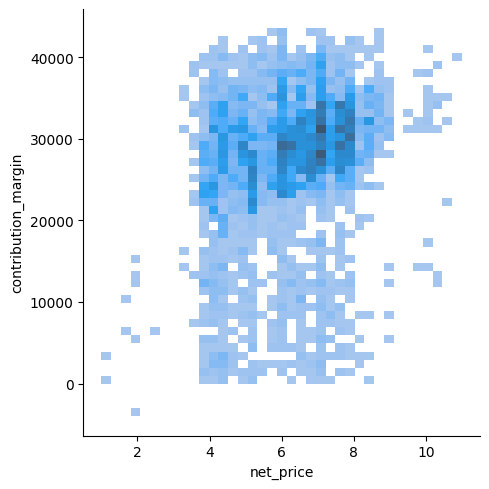

In [169]:
sns.displot(df_sales, x="net_price", y="contribution_margin")
plt.show()

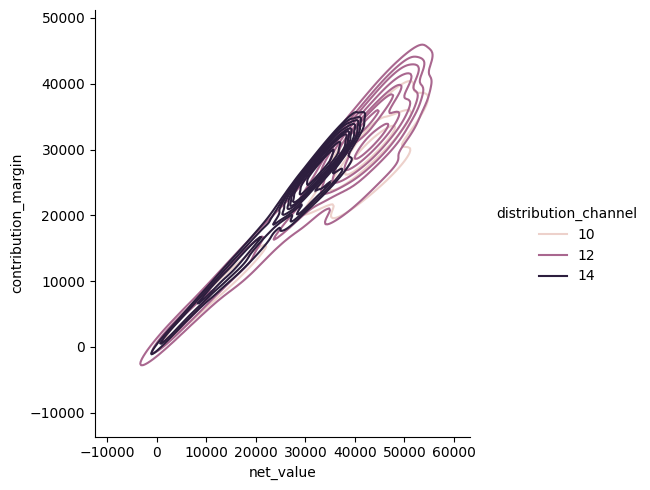

In [170]:
sns.displot(data=df_sales, x="net_value", y="contribution_margin", hue="distribution_channel", kind="kde")
plt.show()

### Jointplot ja pairplot


Kahta muuttujaa voi tarkastella samanaikaisesti jointplotilla. Se piirtää muuttujien suhteesta hajontakaavion ja molemman muuttujan jakauman kuvion reunoille. Jointplot tukee kind= muotoilua tyypeille: scatter (jos ei muuta määritetä), kde (tässä myös reunoilla käyrät, kaikissa muissa histogrammit), hist, hex (kuusikolmio) ja reg (scatterplot ja regressiosuora). Esimerkkiin on yhdistetty datan markkinointi ja myynti -välilehdet ja se kuvaa markkinointikulujen vaikutusta myyntikatteeseen.

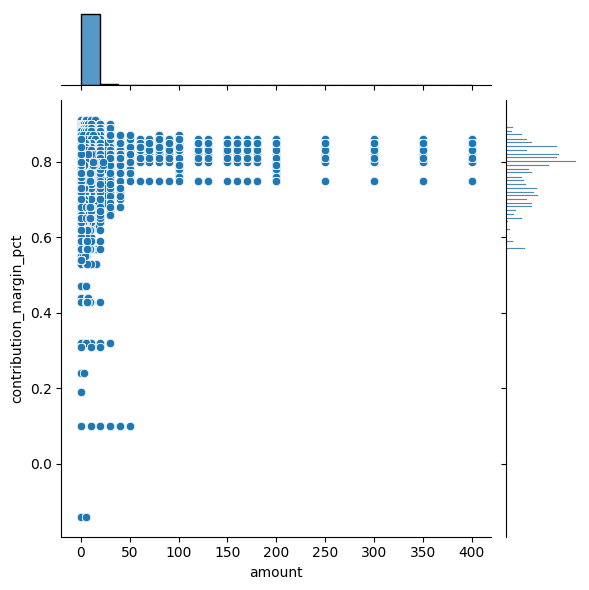

In [171]:
df_merge = pd.merge(df_sales, df_marketing, on="material_number", how="inner")

sns.jointplot(data=df_merge, x="amount", y="contribution_margin_pct")
plt.show()

Tuotiin datan Company_Valuation -välilehti mukaan ja sarakeotsikot muutettiin pienellä kirjoitetuksi. Luotiin uusi taulu df_merge_val_sales, johon yhdistettiin sarakkeita sekä sales että valuation -välilehdiltä. Ajamalla df_merge_val_sales tulostuu taulukon rakenne.

In [172]:
df_valuation = pd.read_excel(r'C:\Users\mirka\Downloads\odata_extraction.xlsx', sheet_name="Company_Valuation")
df_valuation.columns = df_valuation.columns.str.strip().str.lower()

df_merge_val_sales = pd.merge(
    df_valuation[["company_code", "setup_time_investment"]],
    df_sales.groupby("sales_organization")[["net_value", "contribution_margin"]].sum().reset_index(),
    left_on="company_code", right_on="sales_organization", how="inner")

df_merge_val_sales

,company_code,setup_time_investment,sales_organization,net_value,contribution_margin
0,DD,0,DD,10270495.48,7941220.56
1,DD,0,DD,10270495.48,7941220.56
2,DD,0,DD,10270495.48,7941220.56
3,DD,0,DD,10270495.48,7941220.56
4,DD,0,DD,10270495.48,7941220.56
...,...,...,...,...,...
1115,QQ,500000,QQ,11000576.60,8621626.34
1116,QQ,500000,QQ,11000576.60,8621626.34
1117,QQ,500000,QQ,11000576.60,8621626.34
1118,QQ,500000,QQ,11000576.60,8621626.34


Pairplotilla voidaan nähdä monen muuttujan yhteyksiä toisiinsa ja se auttaa hahmottamaan suurta datamäärää yhdellä kertaa. Diagonaalille muodostuvat jakaumakuvaajien tyyliksi voi valita käyrän (diag_kind="kde") vakio histogrammien sijaan. Esimerkki pairplot vertaa alkuinvestoinnin, tilausten nettosumman ja myyntikatteen yhteyksiä. 

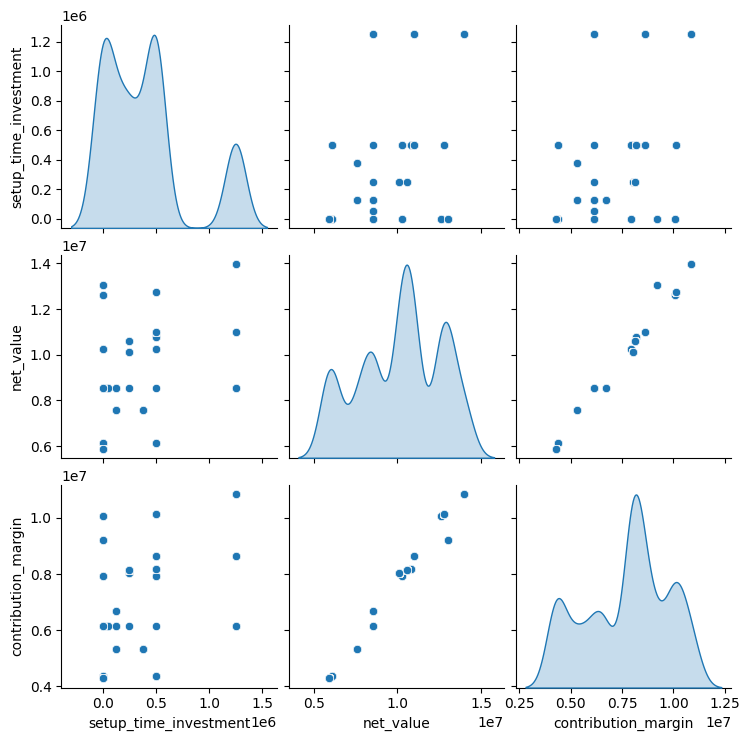

In [173]:
sns.pairplot(
    data=df_merge_val_sales[["setup_time_investment", "net_value", "contribution_margin"]],
    diag_kind="kde")
plt.show()

## Moniulotteiset visualisoinnit

Moniulotteisia kaavioita käytetään kuvaamaan suurta tietomäärää yhdellä kertaa ja se toteutetaan koodeilla facetgrid ja pairgrid, molemmat tarvitsevat g.map -komennon piirtämään kaaviot. Vaikka komennoilla col= ja row= saat muokattua kuvaajia moniosaisiksi, jos haluat muokata visualisointien ulkomuotoa paljon ja tehdä monimutkaisempia kuvaajia facet- tai pairgrid on parempivaihtoehto. Facetgrid kuvaa muutaman muuttujan eroa datassa kun pairgrid kuvaa usean eri muuttuja suhdetta keskenään.

### Facetgrid

Facetgrid koodin row määrittää rivit, col sarakkeet ja hue kuvaa väreillä esimerkiksi eri kategorioita. Esimerkissä on valittu scatterplot kuvaajaksi, mutta suurinta osaa kuvaajatyypeistä voi käyttää tässä (kde, histplot, jne.), on siis valittava kuvaajatyyppi, ei funktiota kuten displot. Seuraavaan esimerkkiin haluttiin tutkia aiemmin määriteltyjen myyntikatteen mukaan 3 parhaan tiimin voiton ja riskiprosentin yhteyttä. Datassa olevasta sim_calendar_date sarakkeesta luotiin uusi sim_month sarake, johon päivämäärät yksinkertaistuivat kuukausi muotoisiksi. Quarter on usein hyödyllinen ajanmääre liiketoiminnan datassa, päivämäärän muokkaus koodiin tulisi vain vaihtaa sarake nimi ja ("M")->("Q"). G.add_legend() lisää selitteen kuvion oikeaan laitaan, facetgridissa valitaan kaikki kuvaajaan haluttavat tekijät, joten se ei piirry automaattisesti kuten osassa aiemmista kuvaajista. Myös Y-akselille lisättiin viiva kuvion selkeyttämiseksi.

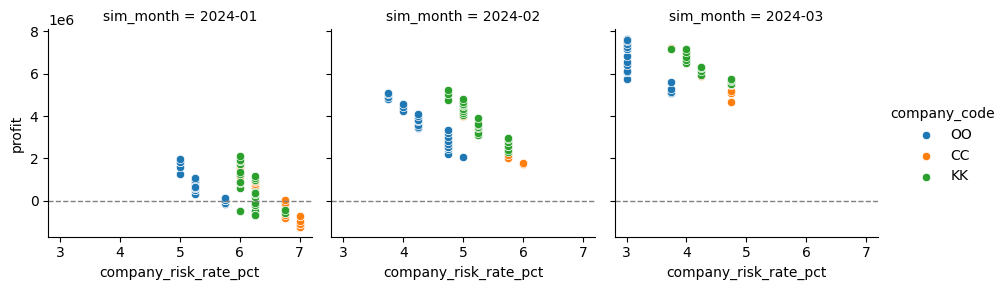

In [174]:
df_valuation["sim_month"] = pd.to_datetime(df_valuation["sim_calendar_date"]).dt.to_period("M").astype(str)

df_val_top3 = df_valuation[df_valuation["company_code"].isin(top3_orgs)]

g = sns.FacetGrid(df_val_top3, col="sim_month", hue="company_code")
g.map_dataframe(sns.scatterplot, x="company_risk_rate_pct", y="profit")
g.add_legend()
for ax in g.axes.flat:
    ax.axhline(0, color="grey", linestyle="--", linewidth=1)
plt.show()

### Pairgrid

Pairgridiin määritellään useita muuttujia, joten se muodostaa monta kuvaajaa ilman col= tai row= käskyä. Esimerkissä on valittu muuttujiksi tilauksen kokonaisarvo, määrä, kustannukset ja myyntikate (%). Kuvaajalla voidaan tarkastella miten jokainen näistä muuttujista vaikuttaa toiseen, ja histogrammit näyttävät muuttujien esiintyvyyden jakaumat koodilla g.map_diag(sns.histplot).

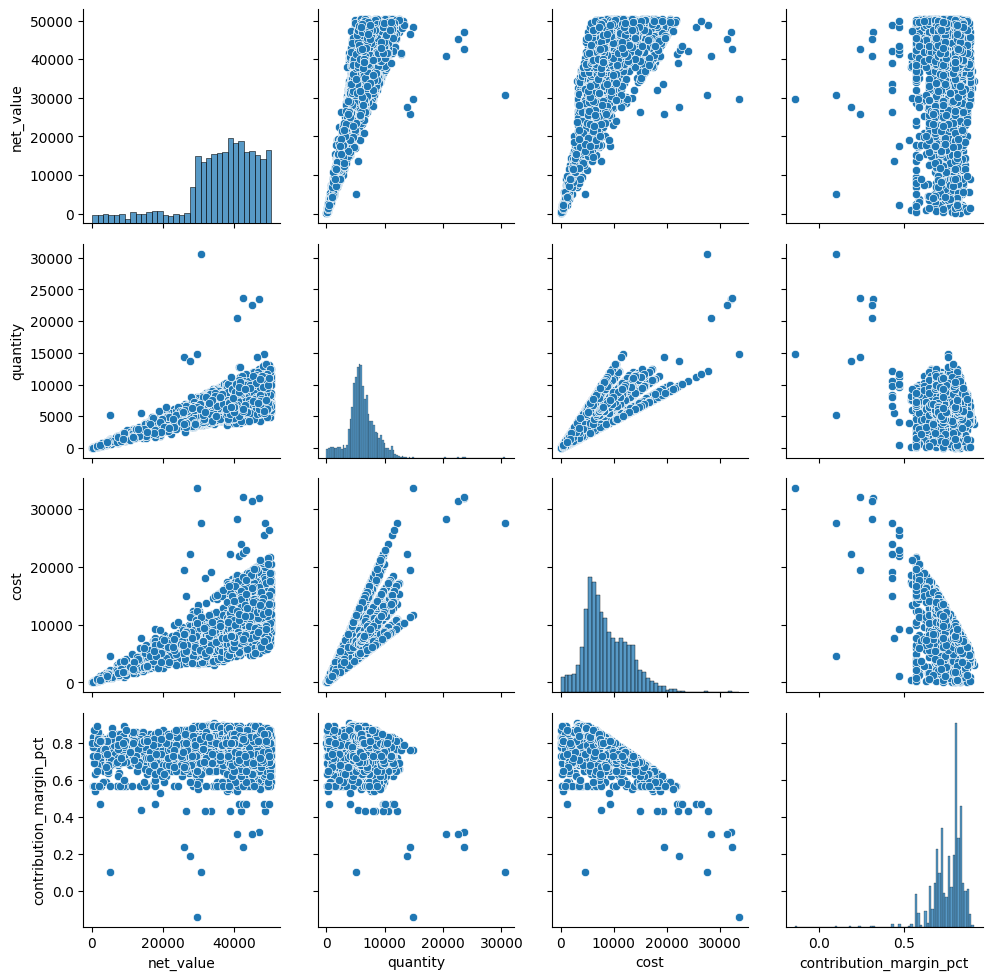

In [175]:
vars_to_plot = ['net_value','quantity','cost','contribution_margin_pct']

g = sns.PairGrid(df_sales[vars_to_plot])
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot)

plt.show()

## Lineaariset regressiomallit

Lineaarisia regressiomalleja kuvataan koodeilla regplot() ja lmplot(). Edistyneempään käyttöön tarvitset statsmodels -kirjastoa, mutta Seabornella ei ole varsinaisesti tarkoitus mennä liian syvällisesti tilastolliseen analyysiin vaan sen visualisonneilla pyritään ymmärtämään dataa paremmin. Merkittävin ero regplotin ja lmplotin välillä on, että lmplot pystyy tekemään useita kuvaajia samanaikaisesti ja regplot vain yhden kerrallaan. Lmpltilla myös hue= komento toimii, regplotilla ei. Lineaarisen regression piirtämiseen tarvitaan numeraalista tietoa, joten sekä x- ja y-akselin on oltava datatyypiltään int tai float, koodilla print(df_sales.dtypes) saat listan datan sarakkeiden tyypeistä, kuten oppaan alussa tehtiin. 

Tässä esimerkissä hinnan ja myyntimäärien välistä suhdetta kuvataan hinnan vaikutusta myyntimäärään. Tietopisteitä on paljon, joten kuvaajan luettavuutta parannettiin lisäämällä pisteiden läpinäkyvyyttä (scatter_kws={"alpha": 0.3}) ja vaihtamalla regressioviivan väri mustaksi (line_kws={"color": "black"}). Regressioviivan varjo kuvaa 95% luottamusväliä, mutta tässä kuvaajassa se ei näy selkeästi datan vähäisen vaihtelun vuoksi.

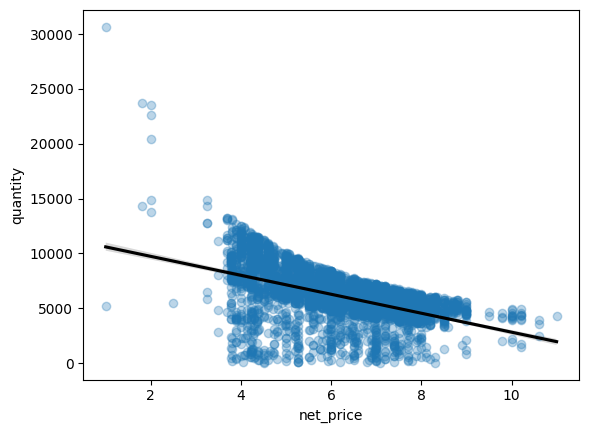

In [176]:
sns.regplot(
    data=df_sales,
    x="net_price",
    y="quantity",
    scatter_kws={"alpha": 0.3},
    line_kws={"color": "black"})
plt.show()

Tässä lmplot esimerkissä kuvataan myyntimäärän ja myyntihinnan suhdetta. Myynti taulusta suodatettiin eniten rahallisesti tuottavat material_labelit (mysli maut) max ja min laskun avulla omaan. Ne erottuvat kaaviossa eri värisinä (hue) ja niille piirtyy omat vaihteluvälilliset regressioviivat.

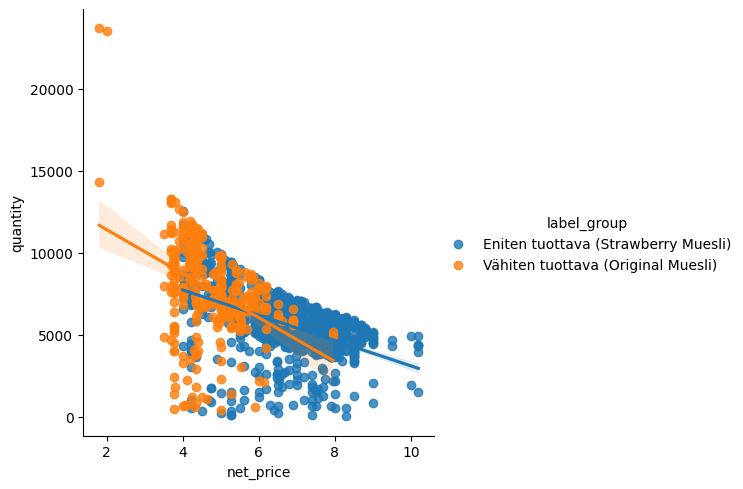

In [177]:
label_totals = df_sales.groupby("material_label")["net_value"].sum()

max_label = label_totals.idxmax()
min_label = label_totals.idxmin()

filtered_df = df_sales[df_sales["material_label"].isin([max_label, min_label])].copy()

filtered_df["label_group"] = filtered_df["material_label"].map({
    max_label: f"Eniten tuottava ({max_label})",
    min_label: f"Vähiten tuottava ({min_label})"})

sns.lmplot(
    data=filtered_df,
    x="net_price",
    y="quantity",
    hue="label_group")
plt.show()

Col= luo myös lmplotissa vierekkäisiä kuvaajia. Tähän valittiin aiemmin filteröidyt, rahallisesti tuottavimmat, ryhmät ja verrataan niiden myyntikatteen(%) vaikutusta myyntimäärään.

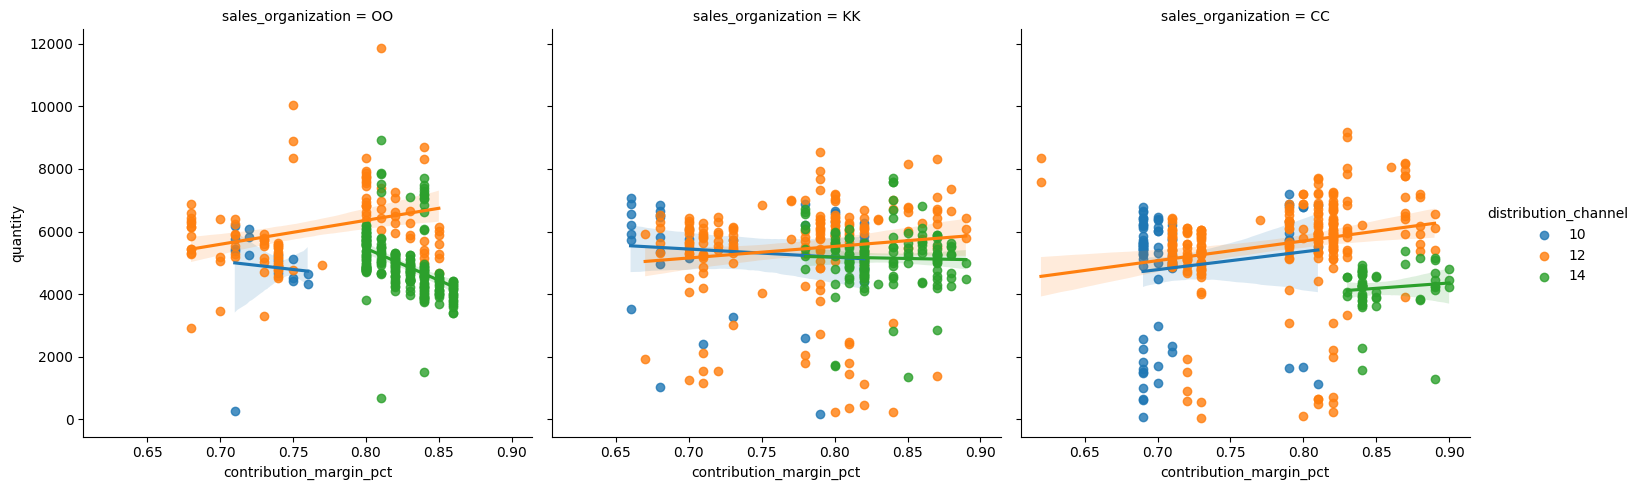

In [178]:
df_filtered_sales = df_sales[df_sales["sales_organization"].isin(top3_orgs)]

sns.lmplot(
    data=df_filtered_sales,
    x="contribution_margin_pct",
    y="quantity",
    hue="distribution_channel",
    col="sales_organization")
plt.show()


Regplotin avulla voidaan luoda monipuolisia kuvaajia. Esimerkiksi jointplotiin yhdistettynä kind="reg" muodostaa kuvaajan, jossa näkyy lineaarinen regressiokuvio ja sen reunoilla histogrammit kuvaamassa tietopisteiden jakaumaa akselien muuttujista. Esimerkissä hajontakaavio esittää kulujen vaikutusta myyntikatteeseen. Sitä kuvataan regressioviivan sekä jakaumia kuvaavien histogrammien avulla (ylhäällä kulujen jakauma ja oikealla myyntikatteen jakauma). Visualisoinnin muuttujat, cost ja contribution margin, ovat molemmat rahamääräisiä ja niiden arvot sijoittuvat samalle alueelle. Visualisointia selkeyttämään luotiin määrittely, jolla x- ja y-akselit alkavat ja loppuvat samoissa arvoissa alin, -5000 ja ylin 50000. 

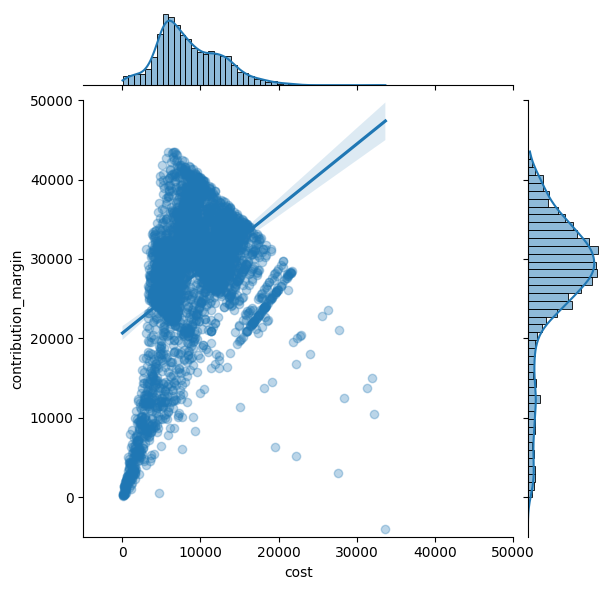

In [179]:
g = sns.jointplot(
    data=df_sales,
    x="cost",
    y="contribution_margin",
    kind="reg",
    scatter_kws={"alpha": 0.3})

g.ax_joint.set_xlim(-5000, 50000)
g.ax_joint.set_ylim(-5000, 50000)

plt.show()

Pairplotilla voidaan esittää samanaikaisesti useiden muuttujien vaikutusta useaan muuttujaan. Ensimmäisessä visualisoinnissa on määritelty muuttuja x- ja y-akseleille ja toisessa haluttiin luoda ruudukkokuva kaikkien muuttujien suhteesta toiseen. Ensin siis kuvataan määrän, nettotilausarvon ja kulujen suhdetta myyntikateprosenttiin ja toisena näiden kaikkien suhdetta toisiinsa. Datan ollessa hyvin suuri voidaan ottaa vain osa datasta mukaan, tässä 2000 tietopistettä. Toisin kuin aiemmassa swarmplot-esimerkissä, tässä koodiin lisättiin random_state=42, jonka ansiosta valittu data on aina sama, eikä kuvaaja muutu joka kerta kun koodi ajetaan. Kuvaan piirtyy regressioviiva koodilla kind="reg". Diag_kind= ei ole määritelty joten toiseen kuvaajaan piirtyy histogrammin diagonaalille. Corner=True jättää kuvaajasta pois toistona muodostuvat kaaviot.

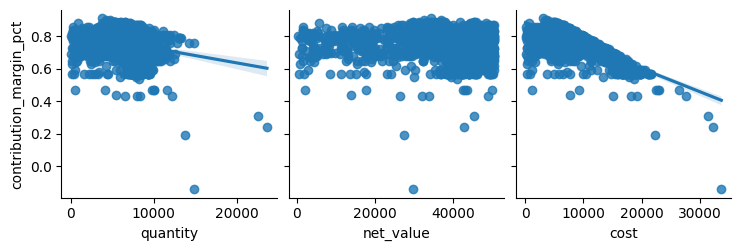

In [180]:
df_sample = df_sales.sample(2000, random_state=42)

sns.pairplot(
    df_sample,
    x_vars=["quantity", "net_value", "cost"],
    y_vars=["contribution_margin_pct"],
    kind="reg")

plt.show()

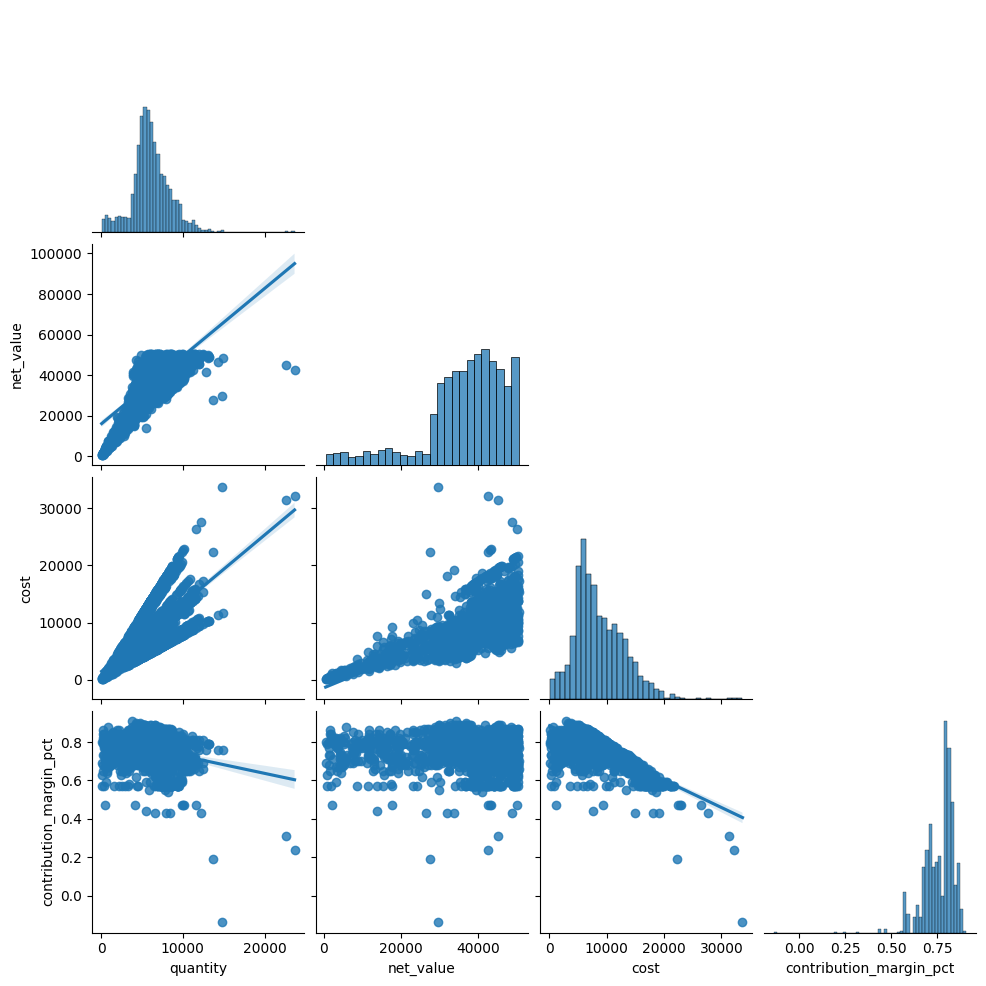

In [181]:
df_sample = df_sales.sample(2000, random_state=42)

sns.pairplot(
    df_sample[["quantity", "net_value", "cost", "contribution_margin_pct"]],
    kind="reg",
    corner=True)

plt.show()

## Teemojen ja tyylien mukauttaminen

Kaikki aiemmin luodut visualisoinnit on tehty ilman teeman tai tyylien suurempia muotoiluja. Seaborn tekee hyvin onnistuneita kuvaajia ilman erikoismuotoiluja, mutta edistyneessä käytössä muotoilut voivat tulla tarpeellisiksi.

### Tyyli

Koodilla sns.set_theme() voit määrittää työkirjan ulkoasun kaikille visualisoinneille yhteisesti. Tällä koodilla koko työkirjalle määritettävä tyyli tulee lisätä koodiin heti import -käskyjen jälkeen. Työkirjasi koodi alkaisi näin, jos haluat muuttaa koko työkirjan tyyliasetuksia yhdellä kertaa: 

import seaborn as sns

sns.set_theme(

    style="darkgrid",
    
    context="notebook",
    
    palette="deep",
    
    font="sans-serif",
    
    font_scale=1,
    
    color_codes=True
    
)

Sns.set_theme() koodin kanssa kannattaa olla varovainen, erityisesti jos käytät Copilotia apuna koodin kirjoittamiseen. Jos pyydät sitä kirjoittamaan koodin muokatulla tyylillä varmista, että koodi koskee vain valittua visualisointia, ellet halua että kaikki visualisointisi saavat pyydetyt muutokset.

### Style

Yksittäisten visualisointien muokkauksen voi tehdä itse visualisointiin aloittamalla koodin käskyllä 
with sns.axes_style("tähän teeman nimi").

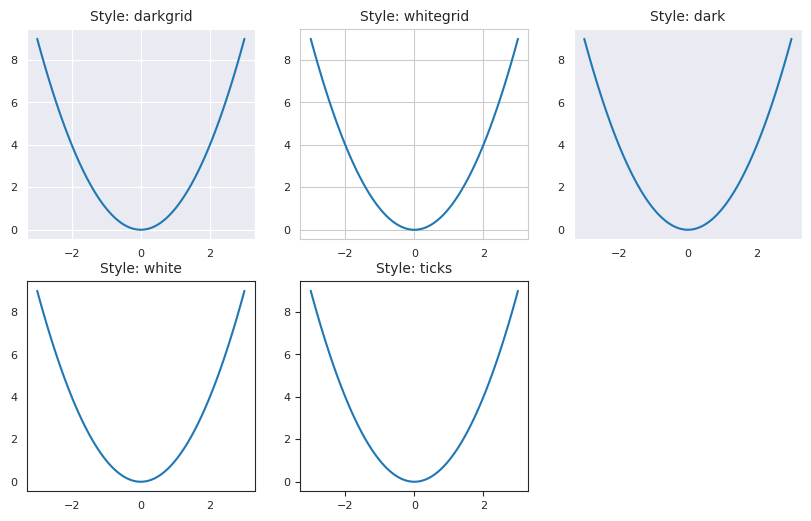

In [182]:
x = np.linspace(-3, 3, 100)
y = x**2
styles = ["darkgrid", "whitegrid", "dark", "white", "ticks"]

f = plt.figure(figsize=(10, 6))
gs = f.add_gridspec(2, 3)

for i, style in enumerate(styles):
    with sns.axes_style(style):
        ax = f.add_subplot(gs[i // 3, i % 3])
        ax.plot(x, y)
        ax.set_title(f"Style: {style}", fontsize=10)
        ax.tick_params(labelsize=8)

f.add_subplot(gs[1, 2]).axis("off")
plt.show()


Reunaviivoja voi muokata myös despine -koodilla. Koodi sns.despine(kuvio, sijainti=True) poistaa viivan niistä kohdista joille annetaan true tai ne voi poistaa osittain koodilla sns.despine(kuvio, trim=True).

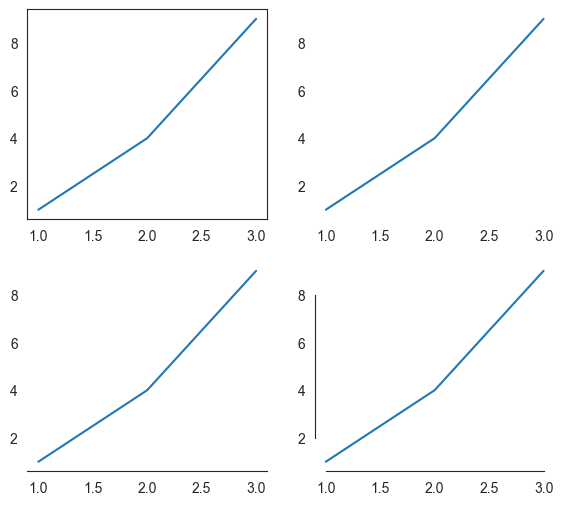

In [183]:
with sns.axes_style("white"):
    fig, axes = plt.subplots(2, 2, figsize=(6.8, 6), sharex=True, sharey=True)
    axes = axes.flatten()

    x = [1, 2, 3]
    y = [1, 4, 9]

    sns.lineplot(x=x, y=y, ax=axes[0])
    axes[0].tick_params(labelbottom=True, labelleft=True)

    sns.lineplot(x=x, y=y, ax=axes[1])
    sns.despine(ax=axes[1], left=True, right=True, top=True, bottom=True)
    axes[1].tick_params(labelbottom=True, labelleft=True)

    sns.lineplot(x=x, y=y, ax=axes[2])
    sns.despine(ax=axes[2], left=True, right=True, top=True)
    axes[2].tick_params(labelbottom=True, labelleft=True)

    sns.lineplot(x=x, y=y, ax=axes[3])
    sns.despine(ax=axes[3], trim=True)
    axes[3].tick_params(labelbottom=True, labelleft=True)

    plt.show()


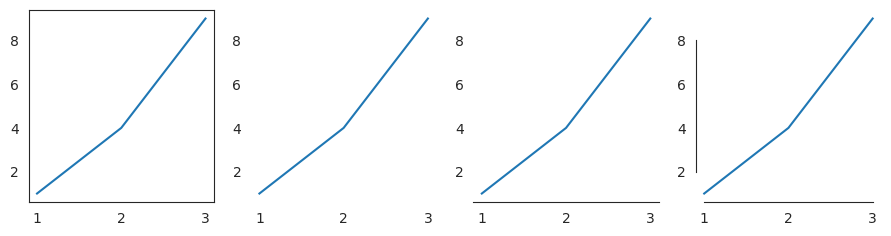

In [184]:
x = [1, 2, 3]
y = [1, 4, 9]

with sns.axes_style("white"):
    fig, axes = plt.subplots(1, 4, figsize=(11, 2.5), sharex=True, sharey=True)

for i, ax in enumerate(axes):
    sns.lineplot(x=x, y=y, ax=ax)
    ax.tick_params(labelbottom=True, labelleft=True)

sns.despine(ax=axes[1], left=True, right=True, top=True, bottom=True)
sns.despine(ax=axes[2], left=True, right=True, top=True)
sns.despine(ax=axes[3], trim=True)

plt.show()


Seabornissa suoraan ei ole reunaviivojen muokkausta saatavilla, mutta jos työkirjaan on lisätty matplotlib (import matplotlib.pyplot as plt) sen avulla voi muokata reuna viivojen väriä (set_color), paksuutta (set_linewidth) ja tyyliä(set_linestyle).

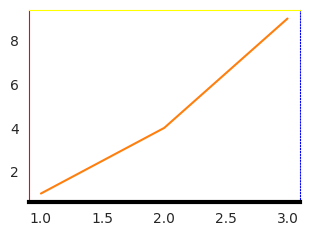

In [185]:
x = [1, 2, 3]
y = [1, 4, 9]

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(3.5, 2.5))
    ax.plot(x, y, color="#ff7f0e")

ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(3)

ax.spines["top"].set_color("yellow")
ax.spines["left"].set_color("red")

ax.spines["right"].set_color("blue")
ax.spines["right"].set_linestyle("dotted")

plt.show()



Jos haluat muuttaa yksittäisten visualisointien väritystä voit tehdä tyyli muutoksia myös yksittäisiin visualisointeihin. Seuraavalla koodilla tausta muutettu mustaksi (=black) ja teksti ja ruudukko valkoisiksi. Voit käyttää tässä myös väri lyhenteitä, kuten b=sininen (blue) ja g=vihreä (green) tai HEX-värikoodeja, esim. oranssi=#ff7f0e.

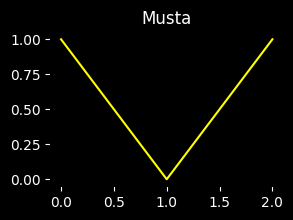

In [186]:
with plt.style.context({
    'axes.facecolor': 'black',
    'figure.facecolor': 'black',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'text.color': 'white'
}):
    fig, ax = plt.subplots(figsize=(3, 2))
    sns.lineplot(x=[0, 1, 2], y=[1, 0, 1],color="yellow")
    plt.title("Musta")
    plt.show()

### Väripaletit

Seabornissa on monia valmiiksi määriteltyjä väripaletteja. Koko työkirjaan voi asettaa vakiovärityksen koodilla sns.set_theme(..., palette="valittu paletti"), tähän voit valita vakiovärin (deep) lisäksi muted, pastel, bright, dark, tai colorblind. Tässä kuvattuna Seabornen vakiovärit, joita se käyttää visualisonneissa ellei toisin määritetä.

In [187]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

#### Väripalettien muokkaus

Seaborn on luotu tekemään selkeitä, valmiita visualisointeja, joita ei tarvitse tyyliltään muokata (Karl 2024). Verrattuna Matplotlibiin, jossa visualisointeja pystyy ja joutuu muokkaamaan paljon, Seabornissa ei ole yhtä laajaa valikoimaa esimerkiksi väripalettien muokkaamiseen, koska tarvetta niille ei varsinaisesti ole. Voit toki käyttää Matplotlibia apuna värien valinnassa ja muokkauksessa jos haluat persoonallisempia visualisointeja.

[Täällä](https://matplotlib.org/stable/users/explain/colors/colormaps.html) voit tutustua Matplotlibin väripaletteihin, joista monet toimivat myös Seabornissa. 
Tai ajamalla koodin:

from matplotlib import colormaps 

list(colormaps)

koodiympäristössä saat nimilistan Matplotlibin kaikista väreistä ja voit testata niitä komennolla 

sns.color_palette("paletti").

Jos haluat esimerkiksi luoda paletin Xamkin teemaväreistä, voit tehdä sen HEX-koodien avulla (Xamk).

In [188]:
xamk_palette = ["#FDB92A", "#8D8D8D", "#000000", "#1DBED0", "#F16280", "#595CA9", "#A6CE39"]
sns.color_palette(xamk_palette)

[(0.9921568627450981, 0.7254901960784313, 0.16470588235294117),
 (0.5529411764705883, 0.5529411764705883, 0.5529411764705883),
 (0.0, 0.0, 0.0),
 (0.11372549019607843, 0.7450980392156863, 0.8156862745098039),
 (0.9450980392156862, 0.3843137254901961, 0.5019607843137255),
 (0.34901960784313724, 0.3607843137254902, 0.6627450980392157),
 (0.6509803921568628, 0.807843137254902, 0.2235294117647059)]

Seuraavassa muutama esimerkki miten voit luoda liukuvan väripaletin. Light_palette luo liukuman niin, että vaalein sävy on vasemmalla ja dark_palette niin että tummin on vasemmalla. Voit vaihtaa tämän järjestyksen lisäämällä koodiin reverse=true komennon. Väreinä voit käyttää mm. HEX-koodeja, värien HTML-nimiä [(löydät ne täältä)](https://www.w3schools.com/colors/colors_names.asp) tai värien perusnimiä blue, yellow jne.

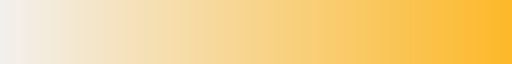

In [189]:
sns.light_palette("#FDB92A", as_cmap=True)

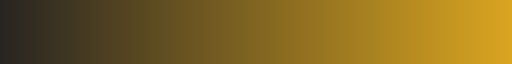

In [190]:
sns.dark_palette("Goldenrod", as_cmap=True)

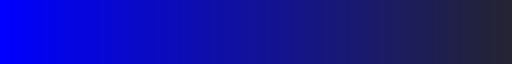

In [191]:
sns.dark_palette("blue",reverse=True, as_cmap=True)

Jos visualisoinnissa halutaan tutkia arvojen poikkeavuutta, niiden keskipisteestä voidaan luoda diverging_palette, jossa keskellä on vaaleimmat värit (tai lisäämällä koodi center="dark" tummat värit) ja molemmilla reunoilla eri värit tummentuen reunaa kohti. Tässä värit saadaan väriympyrästä, eli värejä kuvastavat ovat numerot (0-360) tarkoittavat asteitä väriympyrässä (Kennedy 2024).

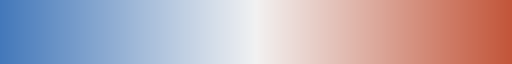

In [192]:
sns.diverging_palette(250, 20, as_cmap=True)

Voit myös luoda liukuman, jossa on valittuna useampia värejä.

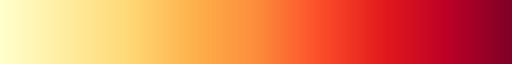

In [193]:
sns.color_palette("YlOrRd", as_cmap=True)

### Fontti ja context

Yksinkertaisimmin voit nimetä kuvaajan lisäämällä koodiin plt.title("nimi"). Koko työkirjaan fontin saa vaihdettua koodilla sns.set_theme(font="fonttinimi") tai yksittäiseen otsikkoon koodilla plt.title("Otsikko", fontsize=numero, family="Fonttinimi").

Tämän koodin ajamalla saat listan käytettävissä olevista fonteista, vakiofontti on sans-serif. 

In [194]:
import matplotlib.font_manager as fm

font_names = sorted({f.name for f in fm.fontManager.ttflist})

for name in font_names:
    print(name)

Agency FB
Algerian
Arial
Arial Rounded MT Bold
Bahnschrift
Baskerville Old Face
Bauhaus 93
Bell MT
Berlin Sans FB
Berlin Sans FB Demi
Bernard MT Condensed
Blackadder ITC
Bodoni MT
Book Antiqua
Bookman Old Style
Bookshelf Symbol 7
Bradley Hand ITC
Britannic Bold
Broadway
Brush Script MT
Calibri
Californian FB
Calisto MT
Cambria
Candara
Castellar
Centaur
Century
Century Gothic
Century Schoolbook
Chiller
Colonna MT
Comic Sans MS
Consolas
Constantia
Cooper Black
Copperplate Gothic Bold
Copperplate Gothic Light
Corbel
Courier New
Curlz MT
DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif Display
Dubai
Ebrima
Edwardian Script ITC
Elephant
Engravers MT
Eras Bold ITC
Eras Demi ITC
Eras Light ITC
Eras Medium ITC
Felix Titling
Footlight MT Light
Forte
Franklin Gothic Book
Franklin Gothic Demi
Franklin Gothic Demi Cond
Franklin Gothic Heavy
Franklin Gothic Medium
Franklin Gothic Medium Cond
Freestyle Script
French Script MT
Gabriola
Gadugi
Garamond
Georgia
Gigi
Gill Sans 

Context= voit valita ns. minkä kokoisen visualisoinnin haluat, tässä tarkoitetaan mihin kokoluokkaan eri osat visualisoinnissa on skaalattu. Vaihtoehdot ovat pienimmästä suurimpaan paper, notebook (oletus), talk tai poster ja niiden nimi kuvaa käyttötarkoitusta, esimerkiksi paper= paperille tulostettavaksi sopiva. Fontin skaalattua kokoa voi muuttaa koodilla font_scale= teemassa, sen oletusarvo 1 tai yksittäisen visualisoinnin sisällä koodilla fontsize=valittu fonttikoko. Koko visualisoinnin kokoa voit muuttaa koodilla (figsize=(leveys, korkeus), jos haluat korkeuden olla esimerkiksi 2,5 sen on oltava kirjoitettu muotoon 2.5.

Seuraavassa esimerkki, jossa visualisointi on muutettu pienemmäksi (paper) ja sen otsikon fontti ja fontin koko on muutettu.

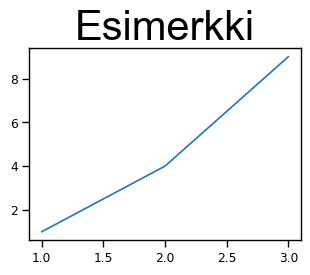

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

x = [1, 2, 3]
y = [1, 4, 9]

with sns.plotting_context("paper"):
    fig, ax = plt.subplots(figsize=(3.5, 2.5))
    sns.lineplot(x=x, y=y, ax=ax)
    plt.title("Esimerkki", fontsize=30, fontname="Arial")
    plt.show()

Tässä vielä muutama esimerkki aiemmin tehdyistä visualisoinneista, joiden ulkoasua on muokattu.

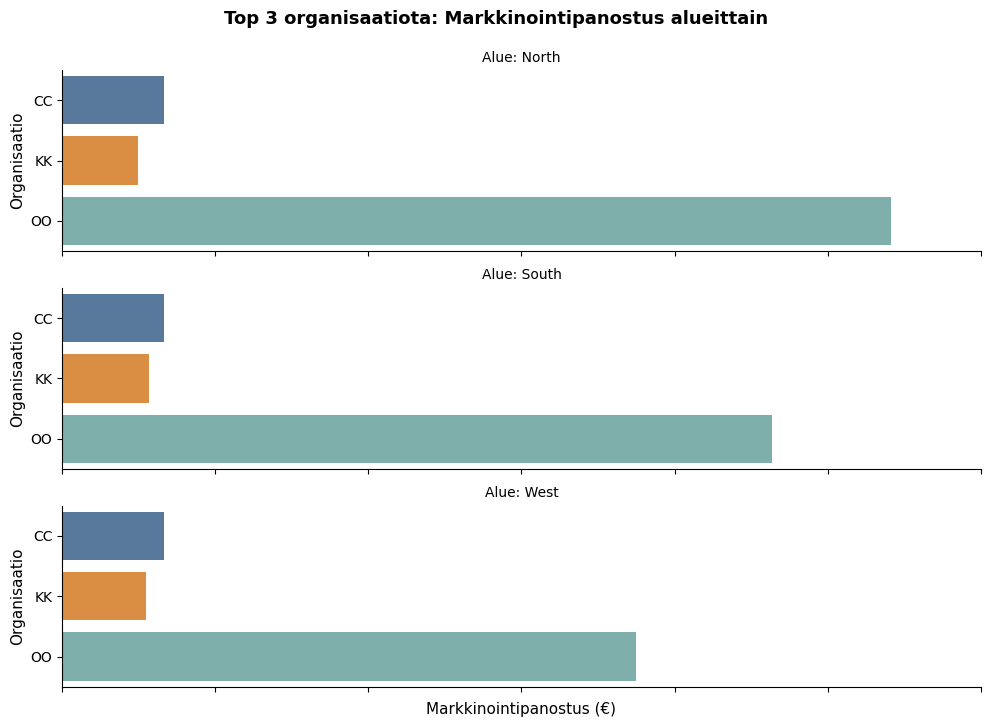

In [196]:
top3_orgs = (
    df_sales.groupby("sales_organization")["contribution_margin"]
    .sum()
    .nlargest(3)
    .index
)

df_filteredtop = df_marketing[df_marketing["sales_organization"].isin(top3_orgs)]

g = sns.catplot(
    data=df_filteredtop,
    x="amount",
    y="sales_organization",
    row="area",
    kind="bar",
    errorbar=None,
    height=2.5,
    aspect=4,
    estimator=sum,
    palette=["#4E79A7", "#F28E2B", "#76B7B2"])

g.set_axis_labels("Markkinointipanostus (€)", "Organisaatio", fontsize=11)
g.set_titles("Alue: {row_name}", fontsize=11)
g.set_xticklabels(rotation=45)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Top 3 organisaatiota: Markkinointipanostus alueittain", fontsize=13, weight="semibold")

plt.show()


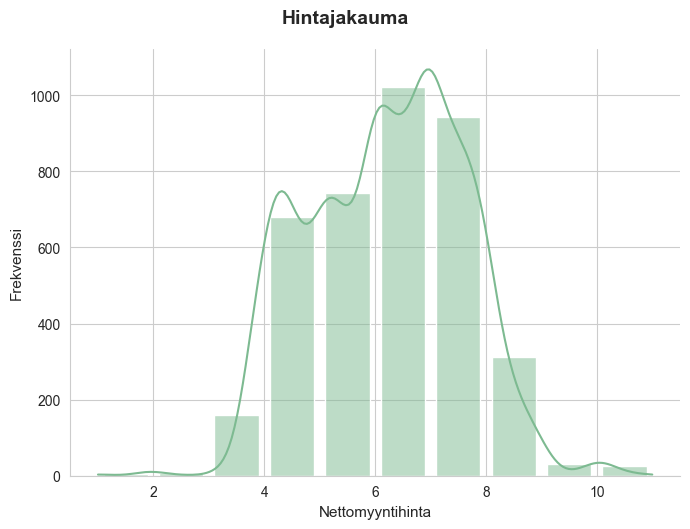

In [197]:
with sns.axes_style("whitegrid"), sns.color_palette("crest"):
    g = sns.displot(
        data=df_sales,
        x="net_price",
        binwidth=1,
        shrink=0.8,
        kde=True,
        height=5,
        aspect=1.4
    )

    g.set_axis_labels("Nettomyyntihinta", "Frekvenssi", fontsize=11)
    g.fig.suptitle("Hintajakauma", fontsize=14, weight="bold", y=1.05)

    plt.show()

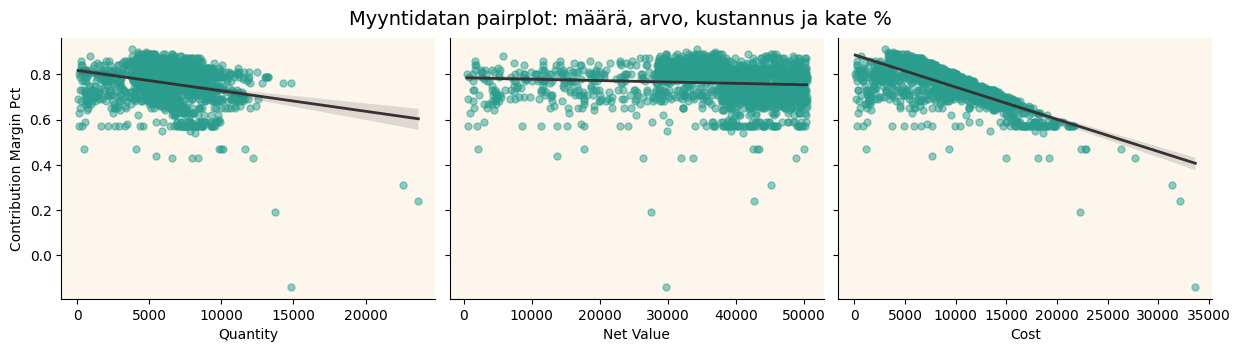

In [198]:
df_sample = df_sales.sample(2000, random_state=42)

g = sns.pairplot(
    df_sample,
    x_vars=["quantity", "net_value", "cost"],
    y_vars=["contribution_margin_pct"],
    kind="reg",
    plot_kws={
        "scatter_kws": {"alpha": 0.5, "s": 25, "color": "#2A9D8F"}, 
        "line_kws": {"color": "#333333", "lw": 2}
    },
    height=3.5, aspect=1.2)

for ax in g.axes.flatten():
    if ax is not None:
        ax.set_facecolor("#FDF6EC")
        ax.set_xlabel(ax.get_xlabel().replace("_", " ").title())  
        ax.set_ylabel(ax.get_ylabel().replace("_", " ").title())

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Myyntidatan pairplot: määrä, arvo, kustannus ja kate %", fontsize=14)

plt.show()

Tässä vielä [linkki](https://seaborn.pydata.org/examples/index.html) Seabornin viralliseen galleriaan, jossa näet mihin kaikkeen sillä pystyy.

## Lähteet

```{admonition} Lähteet
:class: dropdown

Karl, T. How to choose between Seaborn vs. Matplotlib. New Horizons. Päivitetty 12.2.2024. Saatavissa: (https://www.newhorizons.com/resources/blog/how-to-choose-between-seaborn-vs-matplotlib)

Kennedy, E. *The HSB Color System: A Practitioner's Primer*. Learn UI Design. Päivitetty 19.6.2024. Saatavissa: (https://www.learnui.design/blog/the-hsb-color-system-practicioners-primer.html)

Seaborn: Statistical Data Visualization. s.a. Seaborn. Saatavissa:(https://seaborn.pydata.org/index.html)

Xamk. s.a. Xamkin brändiohjeisto. Saatavissa: (https://www.xamk.fi/xamkin-brandiohjeisto/#varit)
```
